# ch03 準備訓練與測試資料(切割data)
<b>1. 善用 Stratified Train-Test Splite : 使用shuffed(每次Training 重新洗牌) </b><br>
<b>2. 資料切割原則 : 切割原則依訓練資料數量來切割，資料多:training 80%, test 20% or  training 90%, test 10%</b><br>
<b>3. 如果訓練耗時，可以考慮切割較高比例</b><br>
<b>4. ex: 10000 筆資料，training 6400(training的80%)， Validation 1600(training的20%)，test 2000(total 20%)</b><br>
<b>5. test 最好用陌生資料(不是同一批)
https://glassboxmedicine.com/2019/09/15/best-use-of-train-val-test-splits-with-tips-for-medical-data/<br>
<b>6.監督式學習 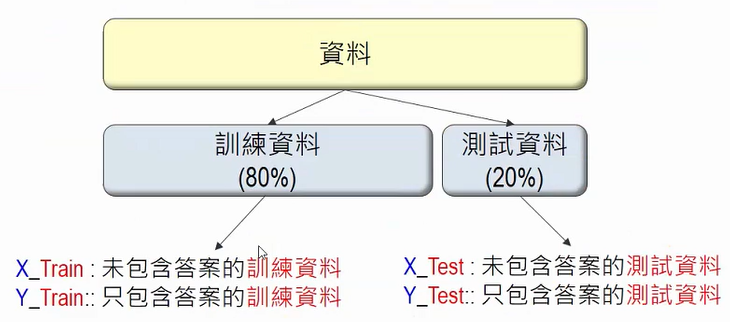
<b>7.非監督式學習: 沒有y_train & y_test (沒有答案)<br>
<b>8.Stratified Train_Test Splits : 均勻分配 --> 加入shuffed :每次Training 重新洗牌
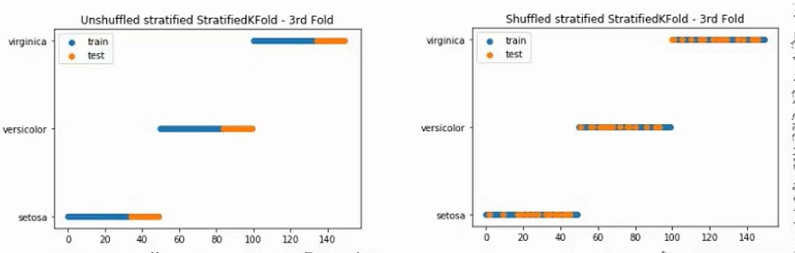
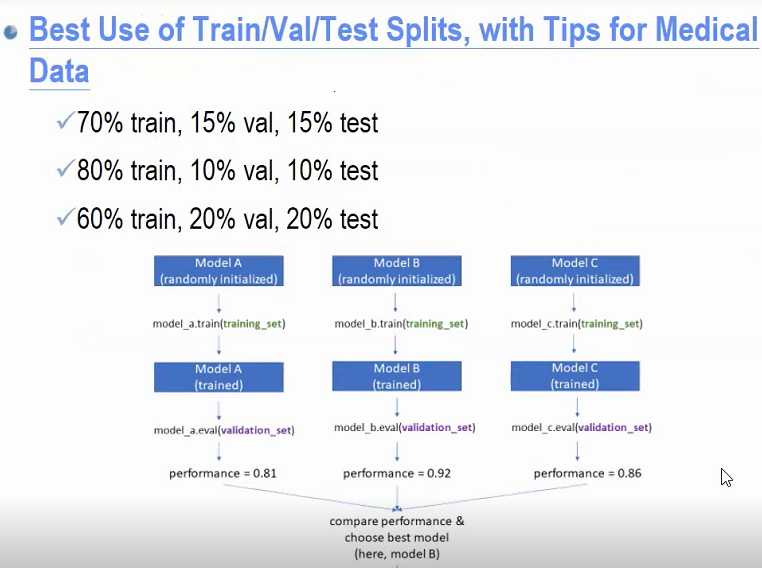

### Scikit-Learn 套件: Training & Test Data 切割
<b>1. KFold  (fold 摺疊；對摺)</b><br>
<b>2. StratifiedKFold(stratify 分層)</b>  
<b>3. RepeatedKFold </b><br>
<b>4. ShuffleSplit </b><br>
<b>5. LeaveOneOut  </b><br>
<b>6. LeavePOut</b><br>
<b>7. GroupKFold</b><br>
<b>8. TimeSeries</b><br>

### 1. K-Fold:將資料切成K 等分，每一等分都會當作測試資料一次，其餘K-1等分當Training Data
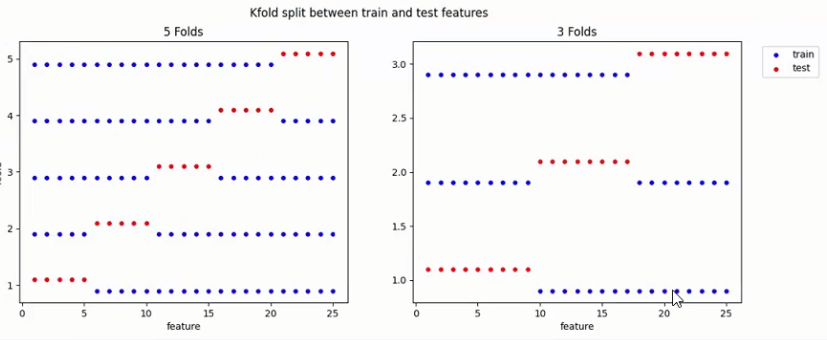

In [16]:
#Complete guide to Python’s cross-validation with examples(https://towardsdatascience.com/complete-guide-to-pythons-cross-validation-with-examples-a9676b5cac12)
#GitHub:Cross Validation(https://github.com/vaasha/Machine-leaning-in-examples/blob/master/sklearn/cross-validation/Cross%20Validation.ipynb)

# Import scikit-learn libraries
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, cross_validate, cross_val_score
from sklearn.datasets import load_iris, load_boston
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# import libraries for charting and manipulations with datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random

iris = load_iris(return_X_y=False)
iris_df = pd.DataFrame(data=iris.data,columns=iris.feature_names)
display(iris_df.head())

features = iris['feature_names']
iris_df['target'] = iris.target
display(iris_df.head())

iris_df["target_name"] = iris_df['target'].map({i:name for i,name in enumerate(iris.target_names)})
display(iris_df.sample(5))

# # initialize the model
model = LogisticRegression(solver="liblinear", multi_class="auto")

dfs = []
kf = KFold(n_splits=3, shuffle=True, random_state=123)
i = 1

for train_index, test_index in kf.split(iris_df):  # KFold 設3 ，迴圈跑3次
    X_train = iris_df.iloc[train_index].loc[:, features]
    X_test = iris_df.iloc[test_index].loc[:,features]
    y_train = iris_df.iloc[train_index].loc[:,'target']
    y_test = iris_df.iloc[test_index].loc[:,'target']
    
    #Train the model
    model.fit(X_train, y_train) #Training the model
    y_pred = model.predict(X_test)
    print(f"Accuracy for the fold no. {i} on the test set: {accuracy_score(y_test, y_pred)}")
    
    # how many occurances appear in the train set
    s_train = iris_df.iloc[train_index].loc[:,'target_name'].value_counts() # 每一種value 都count,效率差
    s_train.name = f"train {i}"
    s_test = iris_df.iloc[test_index].loc[:,'target_name'].value_counts()
    s_test.name = f"test {i}"
    df = pd.concat([s_train, s_test], axis=1, sort=False)
    df["|"] = "|"
    dfs.append(df)
    i += 1

print(pd.concat(dfs,axis=1, sort=False))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
35,5.0,3.2,1.2,0.2,0,setosa
28,5.2,3.4,1.4,0.2,0,setosa
16,5.4,3.9,1.3,0.4,0,setosa
73,6.1,2.8,4.7,1.2,1,versicolor
91,6.1,3.0,4.6,1.4,1,versicolor


Accuracy for the fold no. 1 on the test set: 0.98
Accuracy for the fold no. 2 on the test set: 0.94
Accuracy for the fold no. 3 on the test set: 0.88
            train 1  test 1  |  train 2  test 2  |  train 3  test 3  |
versicolor       39      11  |       33      17  |       28      22  |
virginica        31      19  |       35      15  |       34      16  |
setosa           30      20  |       32      18  |       38      12  |


In [14]:
import pandas as pd
df=pd.read_csv(r"Datasets\titanic.csv")
display(df.head())

sexcount = df.Sex.value_counts()
print("sexcount=\n",sexcount)

pclasscount =df.Pclass.value_counts()
print("pclasscount=\n",pclasscount)

survivedcount =df.Survived.value_counts()
print("survivedcount=\n",survivedcount)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


sexcount=
 male      577
female    314
Name: Sex, dtype: int64
pclasscount=
 3    491
1    216
2    184
Name: Pclass, dtype: int64
survivedcount=
 0    549
1    342
Name: Survived, dtype: int64


### 2.StratifiedKFold ( KFold 切割K個等份資料比例，跟原來資料比例相同): 分割保持各種類資料的比例
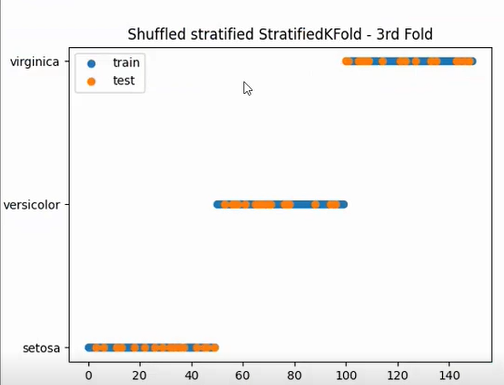

In [20]:
#Complete guide to Python’s cross-validation with examples(https://towardsdatascience.com/complete-guide-to-pythons-cross-validation-with-examples-a9676b5cac12)
#GitHub:Cross Validation(https://github.com/vaasha/Machine-leaning-in-examples/blob/master/sklearn/cross-validation/Cross%20Validation.ipynb)

# Import scikit-learn libraries
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, cross_validate, cross_val_score
from sklearn.datasets import load_iris, load_boston
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# import libraries for charting and manipulations with datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random

iris = load_iris(return_X_y=False)
iris_df = pd.DataFrame(data=iris.data,columns=iris.feature_names)
features = iris['feature_names']
iris_df['target'] = iris.target
iris_df["target_name"] = iris_df['target'].map({i:name for i,name in enumerate(iris.target_names)})
display(iris_df.sample(5))

# Let's see how many samples of each iris type we have in our set
print(pd.DataFrame(iris_df.groupby("target_name").size().reset_index()).rename(columns={0:"samples"}))

# # initialize the model
model = LogisticRegression(solver="liblinear", multi_class="auto")

#Logistic regression without Kfold, just split into 80% train and 20% test set
X = iris_df[features]
y = iris_df["target"]

dfs = []
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=123)
i = 1
for train_index, test_index in kf.split(iris_df, iris_df["target"]):
    X_train = iris_df.iloc[train_index].loc[:, features]
    X_test = iris_df.iloc[test_index].loc[:,features]
    y_train = iris_df.iloc[train_index].loc[:,'target']
    y_test = iris_df.iloc[test_index].loc[:,'target']

    #Train the model
    model.fit(X_train, y_train) #Training the model
    print(f"Accuracy for the fold no. {i} on the test set: {accuracy_score(y_test, model.predict(X_test))}, doublecheck: {model.score(X_test,y_test)}")
    
    # how many occurances appear in the train set
    s_train = iris_df.iloc[train_index].loc[:,'target_name'].value_counts()
    s_train.name = f"train {i}"
    s_test = iris_df.iloc[test_index].loc[:,'target_name'].value_counts()
    s_test.name = f"test {i}"
    df = pd.concat([s_train, s_test], axis=1, sort=False)
    df["|"] = "|"
    dfs.append(df)
    
    i += 1

print(pd.concat(dfs,axis=1, sort=False))

## cross_validate allow to specify metrics which you want to see
#for i, score in enumerate(cross_validate(model, X,y, cv=3)["test_score"]):
#    print(f"Accuracy for the fold no. {i} on the test set: {score}")

#for i, score in enumerate(cross_val_score(model, X,y, cv=3)):
#    print(f"Accuracy for the fold no. {i} on the test set: {score}")

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
76,6.8,2.8,4.8,1.4,1,versicolor
142,5.8,2.7,5.1,1.9,2,virginica
90,5.5,2.6,4.4,1.2,1,versicolor
101,5.8,2.7,5.1,1.9,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


  target_name  samples
0      setosa       50
1  versicolor       50
2   virginica       50
Accuracy for the fold no. 1 on the test set: 0.94, doublecheck: 0.94
Accuracy for the fold no. 2 on the test set: 0.98, doublecheck: 0.98
Accuracy for the fold no. 3 on the test set: 0.92, doublecheck: 0.92
            train 1  test 1  |  train 2  test 2  |  train 3  test 3  |
virginica        34      16  |       33      17  |       33      17  |
versicolor       33      17  |       34      16  |       33      17  |
setosa           33      17  |       33      17  |       34      16  |


### 3.RepeatedKFold ( 重複執行KFold 次數，每一次K-Fold 都使用不同的亂數)
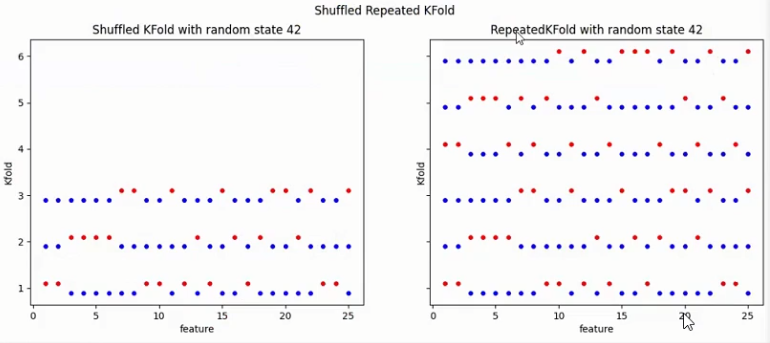

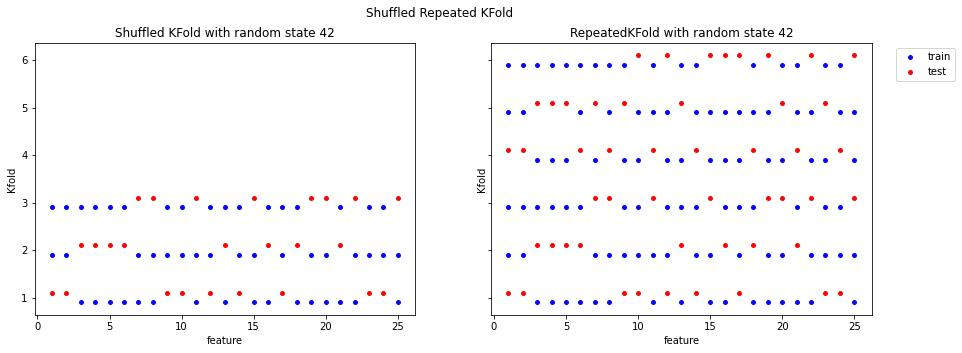

In [44]:
#Complete guide to Python’s cross-validation with examples(https://towardsdatascience.com/complete-guide-to-pythons-cross-validation-with-examples-a9676b5cac12)
#GitHub:Cross Validation(https://github.com/vaasha/Machine-leaning-in-examples/blob/master/sklearn/cross-validation/Cross%20Validation.ipynb)

from sklearn.model_selection import KFold, RepeatedKFold

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

rn = range(1,26)

def kfoldize(kf, rn, shift=.1):
    train = pd.DataFrame()
    test = pd.DataFrame()
    i = 1
    for train_index, test_index in kf.split(rn):
        train_df = pd.DataFrame(np.take(rn, train_index), columns=["x"])
        train_df["val"] = i - shift
        train = train.append(train_df)

        test_df = pd.DataFrame(np.take(rn, test_index), columns=["x"])
        test_df["val"] = i + shift
        test = test.append(test_df)
        i += 1
    return train, test

kf42 = KFold(n_splits=3, shuffle=True, random_state=42)
krf42 = RepeatedKFold(n_splits=3, n_repeats=2, random_state=42)

train42, test42 = kfoldize(kf42,rn)
train123, test123 = kfoldize(krf42,rn)
#train123_2, test123_2 = kfoldize(kf123,rn,shift=.25)

fig,ax = plt.subplots(1,2, figsize=(15,5), sharey=True)
ax[0].scatter(x="x",y="val",c="b",label="train",s=15,data=train42) 
ax[0].scatter(x="x",y="val",c="r",label="test",s=15,data=test42)
ax[1].scatter(x="x",y="val",c="b",label="train",s=15,data=train123)
ax[1].scatter(x="x",y="val",c="r",label="test",s=15,data=test123)
#ax[1].scatter(x="x",y="val",c="k",label="test second run",s=15,data=test123_2)
ax[0].set_ylabel("Kfold")
ax[0].set_xlabel("feature")
ax[0].set_title("Shuffled KFold with random state 42")
ax[1].set_ylabel("Kfold")
ax[1].set_xlabel("feature")
ax[1].set_title("RepeatedKFold with random state 42")
plt.suptitle("Shuffled Repeated KFold")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

In [21]:
#Complete guide to Python’s cross-validation with examples(https://towardsdatascience.com/complete-guide-to-pythons-cross-validation-with-examples-a9676b5cac12)
#GitHub:Cross Validation(https://github.com/vaasha/Machine-leaning-in-examples/blob/master/sklearn/cross-validation/Cross%20Validation.ipynb)

# Import scikit-learn libraries
from sklearn.model_selection import RepeatedKFold, StratifiedKFold, train_test_split, cross_validate, cross_val_score
from sklearn.datasets import load_iris, load_boston
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# import libraries for charting and manipulations with datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random

iris = load_iris(return_X_y=False)
iris_df = pd.DataFrame(data=iris.data,columns=iris.feature_names)
print(iris_df)

features = iris['feature_names']
iris_df['target'] = iris.target
print(iris_df)

iris_df["target_name"] = iris_df['target'].map({i:name for i,name in enumerate(iris.target_names)})
print(iris_df.sample(5))

# initialize the model
model = LogisticRegression(solver="liblinear", multi_class="auto")

dfs = []
rkf42 = RepeatedKFold(n_splits=3, n_repeats=2, random_state=42)# 共作6次
i = 1

for train_index, test_index in rkf42.split(iris_df):
    X_train = iris_df.iloc[train_index].loc[:, features]
    X_test = iris_df.iloc[test_index].loc[:,features]
    y_train = iris_df.iloc[train_index].loc[:,'target']
    y_test = iris_df.iloc[test_index].loc[:,'target']
    
    #Train the model
    model.fit(X_train, y_train) #Training the model
    y_pred = model.predict(X_test)
    print(f"Accuracy for the fold no. {i} on the test set: {accuracy_score(y_test, y_pred)}")
    
    # how many occurances appear in the train set
    s_train = iris_df.iloc[train_index].loc[:,'target_name'].value_counts()
    s_train.name = f"train {i}"
    s_test = iris_df.iloc[test_index].loc[:,'target_name'].value_counts()
    s_test.name = f"test {i}"
    df = pd.concat([s_train, s_test], axis=1, sort=False)
    df["|"] = "|"
    dfs.append(df)
    
    i += 1

print(pd.concat(dfs,axis=1, sort=False))

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
     sepal length (cm)  sepal width (cm)

## 4. ShuffleSplit
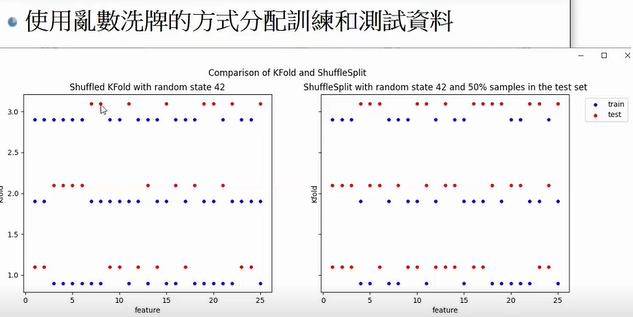

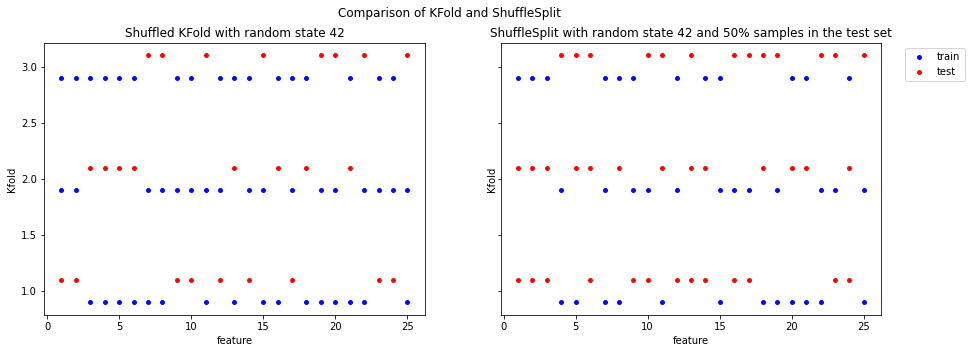

In [43]:
#Complete guide to Python’s cross-validation with examples(https://towardsdatascience.com/complete-guide-to-pythons-cross-validation-with-examples-a9676b5cac12)
#GitHub:Cross Validation(https://github.com/vaasha/Machine-leaning-in-examples/blob/master/sklearn/cross-validation/Cross%20Validation.ipynb)

# Import scikit-learn libraries
from sklearn.model_selection import KFold, ShuffleSplit
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

rn = range(1,26)

def kfoldize(kf, rn, shift=.1):
    train = pd.DataFrame()
    test = pd.DataFrame()
    i = 1
    for train_index, test_index in kf.split(rn):
        train_df = pd.DataFrame(np.take(rn, train_index), columns=["x"])
        train_df["val"] = i - shift
        train = train.append(train_df)

        test_df = pd.DataFrame(np.take(rn, test_index), columns=["x"])
        test_df["val"] = i + shift
        test = test.append(test_df)
        i += 1
    return train, test

kf42 = KFold(n_splits=3, shuffle=True, random_state=42)
ss = ShuffleSplit(n_splits=3, test_size=0.5, random_state=42)

train42, test42 = kfoldize(kf42,rn)
train123, test123 = kfoldize(ss,rn)

fig,ax = plt.subplots(1,2, figsize=(15,5), sharey=True)
ax[0].scatter(x="x",y="val",c="b",label="train",s=15,data=train42) 
ax[0].scatter(x="x",y="val",c="r",label="test",s=15,data=test42)
ax[1].scatter(x="x",y="val",c="b",label="train",s=15,data=train123)
ax[1].scatter(x="x",y="val",c="r",label="test",s=15,data=test123)
ax[0].set_ylabel("Kfold")
ax[0].set_xlabel("feature")
ax[0].set_title("Shuffled KFold with random state 42")
ax[1].set_ylabel("Kfold")
ax[1].set_xlabel("feature")
ax[1].set_title("ShuffleSplit with random state 42 and 50% samples in the test set")
plt.suptitle("Comparison of KFold and ShuffleSplit")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

In [40]:
#Complete guide to Python’s cross-validation with examples(https://towardsdatascience.com/complete-guide-to-pythons-cross-validation-with-examples-a9676b5cac12)
#GitHub:Cross Validation(https://github.com/vaasha/Machine-leaning-in-examples/blob/master/sklearn/cross-validation/Cross%20Validation.ipynb)

# Import scikit-learn libraries
from sklearn.model_selection import ShuffleSplit, train_test_split, cross_validate, cross_val_score
from sklearn.datasets import load_iris, load_boston
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# import libraries for charting and manipulations with datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random

iris = load_iris(return_X_y=False)
iris_df = pd.DataFrame(data=iris.data,columns=iris.feature_names)
display(iris_df)

features = iris['feature_names']
iris_df['target'] = iris.target
display(iris_df)

iris_df["target_name"] = iris_df['target'].map({i:name for i,name in enumerate(iris.target_names)})
display(iris_df.sample(5))

# initialize the model
model = LogisticRegression(solver="liblinear", multi_class="auto")

dfs = []
ss = ShuffleSplit(n_splits=3, test_size=0.2, random_state=42)      # n_splits=3 分成三份
i = 1

for train_index, test_index in ss.split(iris_df):
    X_train = iris_df.iloc[train_index].loc[:, features]
    X_test = iris_df.iloc[test_index].loc[:,features]
    y_train = iris_df.iloc[train_index].loc[:,'target']
    y_test = iris_df.loc[test_index].loc[:,'target']
    
    #Train the model
    model.fit(X_train, y_train) #Training the model
    y_pred = model.predict(X_test)
    print(f"Accuracy for the fold no. {i} on the test set: {accuracy_score(y_test, y_pred)}")
    
    # how many occurances appear in the train set
    s_train = iris_df.iloc[train_index].loc[:,'target_name'].value_counts()
    s_train.name = f"train {i}"
    s_test = iris_df.iloc[test_index].loc[:,'target_name'].value_counts()
    s_test.name = f"test {i}"
    df = pd.concat([s_train, s_test], axis=1, sort=False)
    df["|"] = "|"
    dfs.append(df)
    
    i += 1

print(pd.concat(dfs,axis=1, sort=False))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
36,5.5,3.5,1.3,0.2,0,setosa
37,4.9,3.6,1.4,0.1,0,setosa
138,6.0,3.0,4.8,1.8,2,virginica
48,5.3,3.7,1.5,0.2,0,setosa
142,5.8,2.7,5.1,1.9,2,virginica


Accuracy for the fold no. 1 on the test set: 1.0
Accuracy for the fold no. 2 on the test set: 0.9666666666666667
Accuracy for the fold no. 3 on the test set: 0.9333333333333333
            train 1  test 1  |  train 2  test 2  |  train 3  test 3  |
versicolor       41       9  |       44       6  |       34      16  |
setosa           40      10  |       36      14  |       45       5  |
virginica        39      11  |       40      10  |       41       9  |


## 5. LeaveOneOut
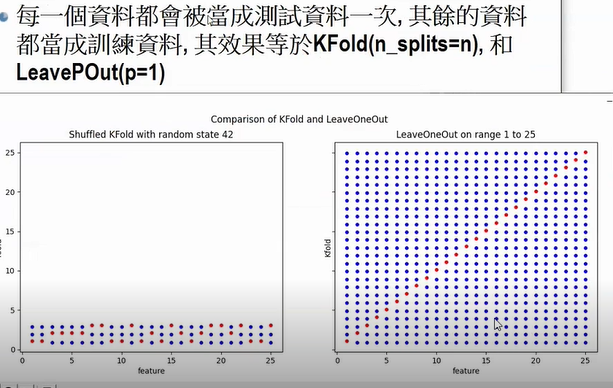

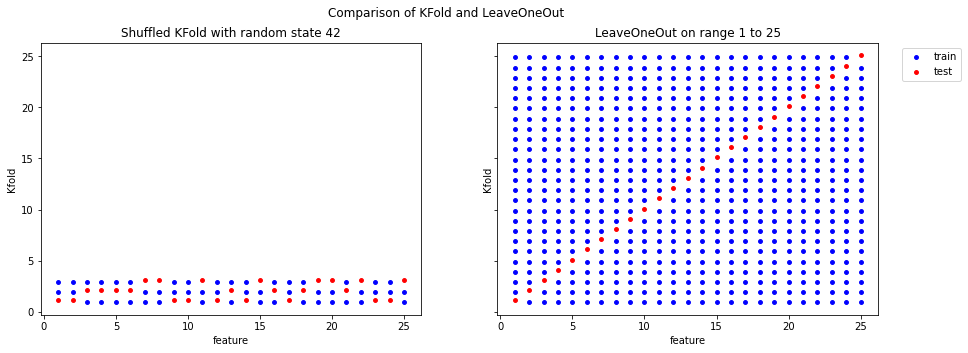

In [45]:
#Complete guide to Python’s cross-validation with examples(https://towardsdatascience.com/complete-guide-to-pythons-cross-validation-with-examples-a9676b5cac12)
#GitHub:Cross Validation(https://github.com/vaasha/Machine-leaning-in-examples/blob/master/sklearn/cross-validation/Cross%20Validation.ipynb)

# Import scikit-learn libraries
from sklearn.model_selection import KFold, LeaveOneOut

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

rn = range(1,26)

def kfoldize(kf, rn, shift=.1):
    train = pd.DataFrame()
    test = pd.DataFrame()
    i = 1
    for train_index, test_index in kf.split(rn):
        train_df = pd.DataFrame(np.take(rn, train_index), columns=["x"])
        train_df["val"] = i - shift
        train = train.append(train_df)

        test_df = pd.DataFrame(np.take(rn, test_index), columns=["x"])
        test_df["val"] = i + shift
        test = test.append(test_df)
        i += 1
    return train, test

kf42 = KFold(n_splits=3, shuffle=True, random_state=42)
loo = LeaveOneOut()

train42, test42 = kfoldize(kf42,rn)
train123, test123 = kfoldize(loo,rn)

fig,ax = plt.subplots(1,2, figsize=(15,5), sharey=True)
ax[0].scatter(x="x",y="val",c="b",label="train",s=15,data=train42) 
ax[0].scatter(x="x",y="val",c="r",label="test",s=15,data=test42)
ax[1].scatter(x="x",y="val",c="b",label="train",s=15,data=train123)
ax[1].scatter(x="x",y="val",c="r",label="test",s=15,data=test123)
#ax[1].scatter(x="x",y="val",c="k",label="test second run",s=15,data=test123_2)
ax[0].set_ylabel("Kfold")
ax[0].set_xlabel("feature")
ax[0].set_title("Shuffled KFold with random state 42")
ax[1].set_ylabel("Kfold")
ax[1].set_xlabel("feature")
ax[1].set_title("LeaveOneOut on range 1 to 25")
plt.suptitle("Comparison of KFold and LeaveOneOut")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()


In [46]:
#Complete guide to Python’s cross-validation with examples(https://towardsdatascience.com/complete-guide-to-pythons-cross-validation-with-examples-a9676b5cac12)
#GitHub:Cross Validation(https://github.com/vaasha/Machine-leaning-in-examples/blob/master/sklearn/cross-validation/Cross%20Validation.ipynb)

# Import scikit-learn libraries
from sklearn.model_selection import LeaveOneOut, train_test_split, cross_validate, cross_val_score
from sklearn.datasets import load_iris, load_boston
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# import libraries for charting and manipulations with datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random

iris = load_iris(return_X_y=False)
iris_df = pd.DataFrame(data=iris.data,columns=iris.feature_names)
print(iris_df)

features = iris['feature_names']
iris_df['target'] = iris.target
print(iris_df)

iris_df["target_name"] = iris_df['target'].map({i:name for i,name in enumerate(iris.target_names)})
print(iris_df.sample(5))

# initialize the model
model = LogisticRegression(solver="liblinear", multi_class="auto")

dfs = []
loo = LeaveOneOut()
i = 1

for train_index, test_index in loo.split(iris_df):
    X_train = iris_df.iloc[train_index].loc[:, features]
    X_test = iris_df.iloc[test_index].loc[:,features]
    y_train = iris_df.iloc[train_index].loc[:,'target']
    y_test = iris_df.loc[test_index].loc[:,'target']
    
    #Train the model
    model.fit(X_train, y_train) #Training the model
    y_pred = model.predict(X_test)
    print(f"Accuracy for the fold no. {i} on the test set: {accuracy_score(y_test, y_pred)}")
    
    # how many occurances appear in the train set
    s_train = iris_df.iloc[train_index].loc[:,'target_name'].value_counts()
    s_train.name = f"train {i}"
    s_test = iris_df.iloc[test_index].loc[:,'target_name'].value_counts()
    s_test.name = f"test {i}"
    df = pd.concat([s_train, s_test], axis=1, sort=False)
    df["|"] = "|"
    dfs.append(df)
    
    i += 1

print(pd.concat(dfs,axis=1, sort=False))

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
     sepal length (cm)  sepal width (cm)

Accuracy for the fold no. 118 on the test set: 1.0
Accuracy for the fold no. 119 on the test set: 1.0
Accuracy for the fold no. 120 on the test set: 1.0
Accuracy for the fold no. 121 on the test set: 1.0
Accuracy for the fold no. 122 on the test set: 1.0
Accuracy for the fold no. 123 on the test set: 1.0
Accuracy for the fold no. 124 on the test set: 1.0
Accuracy for the fold no. 125 on the test set: 1.0
Accuracy for the fold no. 126 on the test set: 1.0
Accuracy for the fold no. 127 on the test set: 1.0
Accuracy for the fold no. 128 on the test set: 1.0
Accuracy for the fold no. 129 on the test set: 1.0
Accuracy for the fold no. 130 on the test set: 0.0
Accuracy for the fold no. 131 on the test set: 1.0
Accuracy for the fold no. 132 on the test set: 1.0
Accuracy for the fold no. 133 on the test set: 1.0
Accuracy for the fold no. 134 on the test set: 0.0
Accuracy for the fold no. 135 on the test set: 1.0
Accuracy for the fold no. 136 on the test set: 1.0
Accuracy for the fold no. 137 o

## 6.LeavePOut
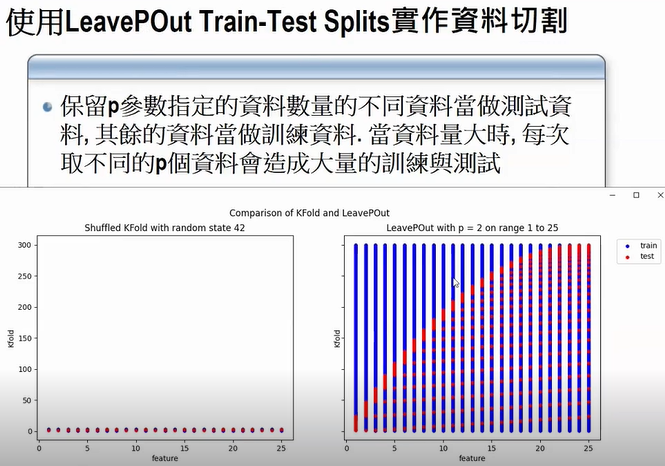

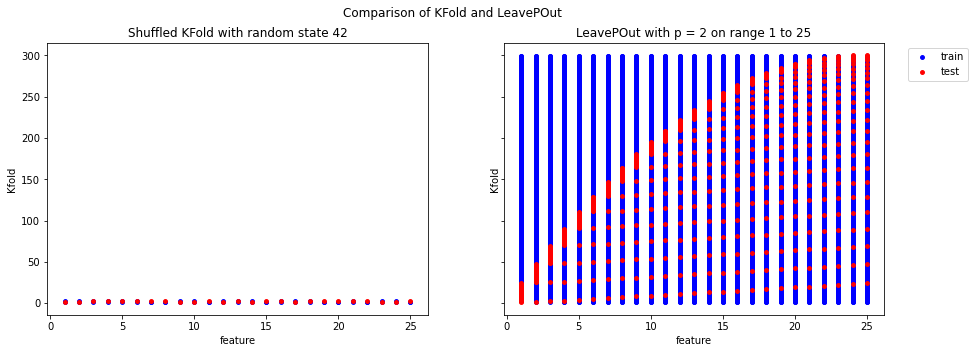

In [47]:
#Complete guide to Python’s cross-validation with examples(https://towardsdatascience.com/complete-guide-to-pythons-cross-validation-with-examples-a9676b5cac12)
#GitHub:Cross Validation(https://github.com/vaasha/Machine-leaning-in-examples/blob/master/sklearn/cross-validation/Cross%20Validation.ipynb)

# Import scikit-learn libraries
from sklearn.model_selection import KFold, LeavePOut

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

rn = range(1,26)

def kfoldize(kf, rn, shift=.1):
    train = pd.DataFrame()
    test = pd.DataFrame()
    i = 1
    for train_index, test_index in kf.split(rn):
        train_df = pd.DataFrame(np.take(rn, train_index), columns=["x"])
        train_df["val"] = i - shift
        train = train.append(train_df)

        test_df = pd.DataFrame(np.take(rn, test_index), columns=["x"])
        test_df["val"] = i + shift
        test = test.append(test_df)
        i += 1
    return train, test

kf42 = KFold(n_splits=3, shuffle=True, random_state=42)
lpo = LeavePOut(p=2)

train42, test42 = kfoldize(kf42,rn)
train123, test123 = kfoldize(lpo,rn)

fig,ax = plt.subplots(1,2, figsize=(15,5), sharey=True)
ax[0].scatter(x="x",y="val",c="b",label="train",s=15,data=train42) 
ax[0].scatter(x="x",y="val",c="r",label="test",s=15,data=test42)
ax[1].scatter(x="x",y="val",c="b",label="train",s=15,data=train123)
ax[1].scatter(x="x",y="val",c="r",label="test",s=15,data=test123)
ax[0].set_ylabel("Kfold")
ax[0].set_xlabel("feature")
ax[0].set_title("Shuffled KFold with random state 42")
ax[1].set_ylabel("Kfold")
ax[1].set_xlabel("feature")
ax[1].set_title("LeavePOut with p = 2 on range 1 to 25")
plt.suptitle("Comparison of KFold and LeavePOut")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

In [48]:
#Complete guide to Python’s cross-validation with examples(https://towardsdatascience.com/complete-guide-to-pythons-cross-validation-with-examples-a9676b5cac12)
#GitHub:Cross Validation(https://github.com/vaasha/Machine-leaning-in-examples/blob/master/sklearn/cross-validation/Cross%20Validation.ipynb)

# Import scikit-learn libraries
from sklearn.model_selection import LeavePOut, StratifiedKFold, train_test_split, cross_validate, cross_val_score
from sklearn.datasets import load_iris, load_boston
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# import libraries for charting and manipulations with datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random

iris = load_iris(return_X_y=False)
iris_df = pd.DataFrame(data=iris.data,columns=iris.feature_names)
print(iris_df)

features = iris['feature_names']
iris_df['target'] = iris.target
print(iris_df)

iris_df["target_name"] = iris_df['target'].map({i:name for i,name in enumerate(iris.target_names)})
print(iris_df.sample(5))

# initialize the model
model = LogisticRegression(solver="liblinear", multi_class="auto")

dfs = []
lpo = LeavePOut(p=2)
i = 1

for train_index, test_index in lpo.split(iris_df):
    X_train = iris_df.iloc[train_index].loc[:, features]
    X_test = iris_df.iloc[test_index].loc[:,features]
    y_train = iris_df.iloc[train_index].loc[:,'target']
    y_test = iris_df.loc[test_index].loc[:,'target']
    
    #Train the model
    model.fit(X_train, y_train) #Training the model
    y_pred = model.predict(X_test)
    print(f"Accuracy for the fold no. {i} on the test set: {accuracy_score(y_test, y_pred)}")
    
    # how many occurances appear in the train set
    s_train = iris_df.iloc[train_index].loc[:,'target_name'].value_counts()
    s_train.name = f"train {i}"
    s_test = iris_df.iloc[test_index].loc[:,'target_name'].value_counts()
    s_test.name = f"test {i}"
    df = pd.concat([s_train, s_test], axis=1, sort=False)
    df["|"] = "|"
    dfs.append(df)
    
    i += 1

print(pd.concat(dfs,axis=1, sort=False))

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
     sepal length (cm)  sepal width (cm)

Accuracy for the fold no. 117 on the test set: 1.0
Accuracy for the fold no. 118 on the test set: 1.0
Accuracy for the fold no. 119 on the test set: 1.0
Accuracy for the fold no. 120 on the test set: 1.0
Accuracy for the fold no. 121 on the test set: 1.0
Accuracy for the fold no. 122 on the test set: 1.0
Accuracy for the fold no. 123 on the test set: 1.0
Accuracy for the fold no. 124 on the test set: 1.0
Accuracy for the fold no. 125 on the test set: 1.0
Accuracy for the fold no. 126 on the test set: 1.0
Accuracy for the fold no. 127 on the test set: 1.0
Accuracy for the fold no. 128 on the test set: 1.0
Accuracy for the fold no. 129 on the test set: 0.5
Accuracy for the fold no. 130 on the test set: 1.0
Accuracy for the fold no. 131 on the test set: 1.0
Accuracy for the fold no. 132 on the test set: 1.0
Accuracy for the fold no. 133 on the test set: 0.5
Accuracy for the fold no. 134 on the test set: 1.0
Accuracy for the fold no. 135 on the test set: 1.0
Accuracy for the fold no. 136 o

Accuracy for the fold no. 293 on the test set: 1.0
Accuracy for the fold no. 294 on the test set: 1.0
Accuracy for the fold no. 295 on the test set: 1.0
Accuracy for the fold no. 296 on the test set: 1.0
Accuracy for the fold no. 297 on the test set: 1.0
Accuracy for the fold no. 298 on the test set: 1.0
Accuracy for the fold no. 299 on the test set: 1.0
Accuracy for the fold no. 300 on the test set: 1.0
Accuracy for the fold no. 301 on the test set: 1.0
Accuracy for the fold no. 302 on the test set: 1.0
Accuracy for the fold no. 303 on the test set: 1.0
Accuracy for the fold no. 304 on the test set: 1.0
Accuracy for the fold no. 305 on the test set: 1.0
Accuracy for the fold no. 306 on the test set: 1.0
Accuracy for the fold no. 307 on the test set: 1.0
Accuracy for the fold no. 308 on the test set: 1.0
Accuracy for the fold no. 309 on the test set: 1.0
Accuracy for the fold no. 310 on the test set: 1.0
Accuracy for the fold no. 311 on the test set: 1.0
Accuracy for the fold no. 312 o

Accuracy for the fold no. 469 on the test set: 1.0
Accuracy for the fold no. 470 on the test set: 1.0
Accuracy for the fold no. 471 on the test set: 1.0
Accuracy for the fold no. 472 on the test set: 1.0
Accuracy for the fold no. 473 on the test set: 1.0
Accuracy for the fold no. 474 on the test set: 1.0
Accuracy for the fold no. 475 on the test set: 1.0
Accuracy for the fold no. 476 on the test set: 1.0
Accuracy for the fold no. 477 on the test set: 1.0
Accuracy for the fold no. 478 on the test set: 1.0
Accuracy for the fold no. 479 on the test set: 1.0
Accuracy for the fold no. 480 on the test set: 1.0
Accuracy for the fold no. 481 on the test set: 1.0
Accuracy for the fold no. 482 on the test set: 1.0
Accuracy for the fold no. 483 on the test set: 1.0
Accuracy for the fold no. 484 on the test set: 1.0
Accuracy for the fold no. 485 on the test set: 1.0
Accuracy for the fold no. 486 on the test set: 1.0
Accuracy for the fold no. 487 on the test set: 1.0
Accuracy for the fold no. 488 o

Accuracy for the fold no. 638 on the test set: 1.0
Accuracy for the fold no. 639 on the test set: 1.0
Accuracy for the fold no. 640 on the test set: 1.0
Accuracy for the fold no. 641 on the test set: 1.0
Accuracy for the fold no. 642 on the test set: 1.0
Accuracy for the fold no. 643 on the test set: 1.0
Accuracy for the fold no. 644 on the test set: 1.0
Accuracy for the fold no. 645 on the test set: 1.0
Accuracy for the fold no. 646 on the test set: 1.0
Accuracy for the fold no. 647 on the test set: 1.0
Accuracy for the fold no. 648 on the test set: 1.0
Accuracy for the fold no. 649 on the test set: 1.0
Accuracy for the fold no. 650 on the test set: 1.0
Accuracy for the fold no. 651 on the test set: 1.0
Accuracy for the fold no. 652 on the test set: 0.5
Accuracy for the fold no. 653 on the test set: 1.0
Accuracy for the fold no. 654 on the test set: 1.0
Accuracy for the fold no. 655 on the test set: 1.0
Accuracy for the fold no. 656 on the test set: 0.5
Accuracy for the fold no. 657 o

Accuracy for the fold no. 808 on the test set: 1.0
Accuracy for the fold no. 809 on the test set: 1.0
Accuracy for the fold no. 810 on the test set: 1.0
Accuracy for the fold no. 811 on the test set: 1.0
Accuracy for the fold no. 812 on the test set: 1.0
Accuracy for the fold no. 813 on the test set: 0.5
Accuracy for the fold no. 814 on the test set: 0.5
Accuracy for the fold no. 815 on the test set: 0.5
Accuracy for the fold no. 816 on the test set: 1.0
Accuracy for the fold no. 817 on the test set: 1.0
Accuracy for the fold no. 818 on the test set: 1.0
Accuracy for the fold no. 819 on the test set: 1.0
Accuracy for the fold no. 820 on the test set: 1.0
Accuracy for the fold no. 821 on the test set: 1.0
Accuracy for the fold no. 822 on the test set: 1.0
Accuracy for the fold no. 823 on the test set: 1.0
Accuracy for the fold no. 824 on the test set: 1.0
Accuracy for the fold no. 825 on the test set: 1.0
Accuracy for the fold no. 826 on the test set: 1.0
Accuracy for the fold no. 827 o

Accuracy for the fold no. 978 on the test set: 1.0
Accuracy for the fold no. 979 on the test set: 1.0
Accuracy for the fold no. 980 on the test set: 1.0
Accuracy for the fold no. 981 on the test set: 1.0
Accuracy for the fold no. 982 on the test set: 1.0
Accuracy for the fold no. 983 on the test set: 1.0
Accuracy for the fold no. 984 on the test set: 1.0
Accuracy for the fold no. 985 on the test set: 1.0
Accuracy for the fold no. 986 on the test set: 1.0
Accuracy for the fold no. 987 on the test set: 1.0
Accuracy for the fold no. 988 on the test set: 1.0
Accuracy for the fold no. 989 on the test set: 1.0
Accuracy for the fold no. 990 on the test set: 1.0
Accuracy for the fold no. 991 on the test set: 1.0
Accuracy for the fold no. 992 on the test set: 1.0
Accuracy for the fold no. 993 on the test set: 1.0
Accuracy for the fold no. 994 on the test set: 1.0
Accuracy for the fold no. 995 on the test set: 1.0
Accuracy for the fold no. 996 on the test set: 1.0
Accuracy for the fold no. 997 o

Accuracy for the fold no. 1138 on the test set: 1.0
Accuracy for the fold no. 1139 on the test set: 1.0
Accuracy for the fold no. 1140 on the test set: 1.0
Accuracy for the fold no. 1141 on the test set: 1.0
Accuracy for the fold no. 1142 on the test set: 1.0
Accuracy for the fold no. 1143 on the test set: 1.0
Accuracy for the fold no. 1144 on the test set: 0.5
Accuracy for the fold no. 1145 on the test set: 1.0
Accuracy for the fold no. 1146 on the test set: 1.0
Accuracy for the fold no. 1147 on the test set: 1.0
Accuracy for the fold no. 1148 on the test set: 0.5
Accuracy for the fold no. 1149 on the test set: 1.0
Accuracy for the fold no. 1150 on the test set: 1.0
Accuracy for the fold no. 1151 on the test set: 1.0
Accuracy for the fold no. 1152 on the test set: 1.0
Accuracy for the fold no. 1153 on the test set: 1.0
Accuracy for the fold no. 1154 on the test set: 1.0
Accuracy for the fold no. 1155 on the test set: 1.0
Accuracy for the fold no. 1156 on the test set: 1.0
Accuracy for

Accuracy for the fold no. 1297 on the test set: 1.0
Accuracy for the fold no. 1298 on the test set: 1.0
Accuracy for the fold no. 1299 on the test set: 1.0
Accuracy for the fold no. 1300 on the test set: 1.0
Accuracy for the fold no. 1301 on the test set: 1.0
Accuracy for the fold no. 1302 on the test set: 1.0
Accuracy for the fold no. 1303 on the test set: 1.0
Accuracy for the fold no. 1304 on the test set: 1.0
Accuracy for the fold no. 1305 on the test set: 1.0
Accuracy for the fold no. 1306 on the test set: 1.0
Accuracy for the fold no. 1307 on the test set: 1.0
Accuracy for the fold no. 1308 on the test set: 1.0
Accuracy for the fold no. 1309 on the test set: 1.0
Accuracy for the fold no. 1310 on the test set: 1.0
Accuracy for the fold no. 1311 on the test set: 1.0
Accuracy for the fold no. 1312 on the test set: 1.0
Accuracy for the fold no. 1313 on the test set: 1.0
Accuracy for the fold no. 1314 on the test set: 1.0
Accuracy for the fold no. 1315 on the test set: 1.0
Accuracy for

Accuracy for the fold no. 1455 on the test set: 1.0
Accuracy for the fold no. 1456 on the test set: 1.0
Accuracy for the fold no. 1457 on the test set: 1.0
Accuracy for the fold no. 1458 on the test set: 1.0
Accuracy for the fold no. 1459 on the test set: 1.0
Accuracy for the fold no. 1460 on the test set: 1.0
Accuracy for the fold no. 1461 on the test set: 1.0
Accuracy for the fold no. 1462 on the test set: 1.0
Accuracy for the fold no. 1463 on the test set: 1.0
Accuracy for the fold no. 1464 on the test set: 1.0
Accuracy for the fold no. 1465 on the test set: 1.0
Accuracy for the fold no. 1466 on the test set: 1.0
Accuracy for the fold no. 1467 on the test set: 1.0
Accuracy for the fold no. 1468 on the test set: 1.0
Accuracy for the fold no. 1469 on the test set: 1.0
Accuracy for the fold no. 1470 on the test set: 1.0
Accuracy for the fold no. 1471 on the test set: 1.0
Accuracy for the fold no. 1472 on the test set: 1.0
Accuracy for the fold no. 1473 on the test set: 1.0
Accuracy for

Accuracy for the fold no. 1624 on the test set: 1.0
Accuracy for the fold no. 1625 on the test set: 1.0
Accuracy for the fold no. 1626 on the test set: 1.0
Accuracy for the fold no. 1627 on the test set: 1.0
Accuracy for the fold no. 1628 on the test set: 1.0
Accuracy for the fold no. 1629 on the test set: 1.0
Accuracy for the fold no. 1630 on the test set: 1.0
Accuracy for the fold no. 1631 on the test set: 1.0
Accuracy for the fold no. 1632 on the test set: 1.0
Accuracy for the fold no. 1633 on the test set: 1.0
Accuracy for the fold no. 1634 on the test set: 1.0
Accuracy for the fold no. 1635 on the test set: 1.0
Accuracy for the fold no. 1636 on the test set: 1.0
Accuracy for the fold no. 1637 on the test set: 1.0
Accuracy for the fold no. 1638 on the test set: 1.0
Accuracy for the fold no. 1639 on the test set: 0.5
Accuracy for the fold no. 1640 on the test set: 1.0
Accuracy for the fold no. 1641 on the test set: 1.0
Accuracy for the fold no. 1642 on the test set: 1.0
Accuracy for

Accuracy for the fold no. 1783 on the test set: 1.0
Accuracy for the fold no. 1784 on the test set: 1.0
Accuracy for the fold no. 1785 on the test set: 1.0
Accuracy for the fold no. 1786 on the test set: 1.0
Accuracy for the fold no. 1787 on the test set: 1.0
Accuracy for the fold no. 1788 on the test set: 1.0
Accuracy for the fold no. 1789 on the test set: 1.0
Accuracy for the fold no. 1790 on the test set: 1.0
Accuracy for the fold no. 1791 on the test set: 1.0
Accuracy for the fold no. 1792 on the test set: 1.0
Accuracy for the fold no. 1793 on the test set: 0.5
Accuracy for the fold no. 1794 on the test set: 0.5
Accuracy for the fold no. 1795 on the test set: 0.5
Accuracy for the fold no. 1796 on the test set: 1.0
Accuracy for the fold no. 1797 on the test set: 1.0
Accuracy for the fold no. 1798 on the test set: 1.0
Accuracy for the fold no. 1799 on the test set: 1.0
Accuracy for the fold no. 1800 on the test set: 1.0
Accuracy for the fold no. 1801 on the test set: 1.0
Accuracy for

Accuracy for the fold no. 1957 on the test set: 1.0
Accuracy for the fold no. 1958 on the test set: 1.0
Accuracy for the fold no. 1959 on the test set: 1.0
Accuracy for the fold no. 1960 on the test set: 1.0
Accuracy for the fold no. 1961 on the test set: 1.0
Accuracy for the fold no. 1962 on the test set: 1.0
Accuracy for the fold no. 1963 on the test set: 1.0
Accuracy for the fold no. 1964 on the test set: 1.0
Accuracy for the fold no. 1965 on the test set: 1.0
Accuracy for the fold no. 1966 on the test set: 1.0
Accuracy for the fold no. 1967 on the test set: 1.0
Accuracy for the fold no. 1968 on the test set: 1.0
Accuracy for the fold no. 1969 on the test set: 1.0
Accuracy for the fold no. 1970 on the test set: 1.0
Accuracy for the fold no. 1971 on the test set: 1.0
Accuracy for the fold no. 1972 on the test set: 1.0
Accuracy for the fold no. 1973 on the test set: 1.0
Accuracy for the fold no. 1974 on the test set: 1.0
Accuracy for the fold no. 1975 on the test set: 0.5
Accuracy for

Accuracy for the fold no. 2128 on the test set: 1.0
Accuracy for the fold no. 2129 on the test set: 1.0
Accuracy for the fold no. 2130 on the test set: 1.0
Accuracy for the fold no. 2131 on the test set: 1.0
Accuracy for the fold no. 2132 on the test set: 1.0
Accuracy for the fold no. 2133 on the test set: 1.0
Accuracy for the fold no. 2134 on the test set: 1.0
Accuracy for the fold no. 2135 on the test set: 1.0
Accuracy for the fold no. 2136 on the test set: 1.0
Accuracy for the fold no. 2137 on the test set: 1.0
Accuracy for the fold no. 2138 on the test set: 1.0
Accuracy for the fold no. 2139 on the test set: 1.0
Accuracy for the fold no. 2140 on the test set: 1.0
Accuracy for the fold no. 2141 on the test set: 1.0
Accuracy for the fold no. 2142 on the test set: 1.0
Accuracy for the fold no. 2143 on the test set: 1.0
Accuracy for the fold no. 2144 on the test set: 1.0
Accuracy for the fold no. 2145 on the test set: 1.0
Accuracy for the fold no. 2146 on the test set: 1.0
Accuracy for

Accuracy for the fold no. 2298 on the test set: 1.0
Accuracy for the fold no. 2299 on the test set: 1.0
Accuracy for the fold no. 2300 on the test set: 1.0
Accuracy for the fold no. 2301 on the test set: 1.0
Accuracy for the fold no. 2302 on the test set: 1.0
Accuracy for the fold no. 2303 on the test set: 1.0
Accuracy for the fold no. 2304 on the test set: 1.0
Accuracy for the fold no. 2305 on the test set: 1.0
Accuracy for the fold no. 2306 on the test set: 1.0
Accuracy for the fold no. 2307 on the test set: 1.0
Accuracy for the fold no. 2308 on the test set: 1.0
Accuracy for the fold no. 2309 on the test set: 1.0
Accuracy for the fold no. 2310 on the test set: 1.0
Accuracy for the fold no. 2311 on the test set: 1.0
Accuracy for the fold no. 2312 on the test set: 1.0
Accuracy for the fold no. 2313 on the test set: 1.0
Accuracy for the fold no. 2314 on the test set: 0.5
Accuracy for the fold no. 2315 on the test set: 1.0
Accuracy for the fold no. 2316 on the test set: 1.0
Accuracy for

Accuracy for the fold no. 2456 on the test set: 1.0
Accuracy for the fold no. 2457 on the test set: 1.0
Accuracy for the fold no. 2458 on the test set: 1.0
Accuracy for the fold no. 2459 on the test set: 1.0
Accuracy for the fold no. 2460 on the test set: 1.0
Accuracy for the fold no. 2461 on the test set: 1.0
Accuracy for the fold no. 2462 on the test set: 1.0
Accuracy for the fold no. 2463 on the test set: 0.5
Accuracy for the fold no. 2464 on the test set: 0.5
Accuracy for the fold no. 2465 on the test set: 0.5
Accuracy for the fold no. 2466 on the test set: 1.0
Accuracy for the fold no. 2467 on the test set: 1.0
Accuracy for the fold no. 2468 on the test set: 1.0
Accuracy for the fold no. 2469 on the test set: 1.0
Accuracy for the fold no. 2470 on the test set: 1.0
Accuracy for the fold no. 2471 on the test set: 1.0
Accuracy for the fold no. 2472 on the test set: 1.0
Accuracy for the fold no. 2473 on the test set: 1.0
Accuracy for the fold no. 2474 on the test set: 1.0
Accuracy for

Accuracy for the fold no. 2615 on the test set: 1.0
Accuracy for the fold no. 2616 on the test set: 1.0
Accuracy for the fold no. 2617 on the test set: 1.0
Accuracy for the fold no. 2618 on the test set: 1.0
Accuracy for the fold no. 2619 on the test set: 1.0
Accuracy for the fold no. 2620 on the test set: 1.0
Accuracy for the fold no. 2621 on the test set: 1.0
Accuracy for the fold no. 2622 on the test set: 1.0
Accuracy for the fold no. 2623 on the test set: 1.0
Accuracy for the fold no. 2624 on the test set: 1.0
Accuracy for the fold no. 2625 on the test set: 1.0
Accuracy for the fold no. 2626 on the test set: 1.0
Accuracy for the fold no. 2627 on the test set: 1.0
Accuracy for the fold no. 2628 on the test set: 1.0
Accuracy for the fold no. 2629 on the test set: 1.0
Accuracy for the fold no. 2630 on the test set: 1.0
Accuracy for the fold no. 2631 on the test set: 1.0
Accuracy for the fold no. 2632 on the test set: 1.0
Accuracy for the fold no. 2633 on the test set: 1.0
Accuracy for

Accuracy for the fold no. 2785 on the test set: 1.0
Accuracy for the fold no. 2786 on the test set: 1.0
Accuracy for the fold no. 2787 on the test set: 1.0
Accuracy for the fold no. 2788 on the test set: 1.0
Accuracy for the fold no. 2789 on the test set: 1.0
Accuracy for the fold no. 2790 on the test set: 1.0
Accuracy for the fold no. 2791 on the test set: 1.0
Accuracy for the fold no. 2792 on the test set: 1.0
Accuracy for the fold no. 2793 on the test set: 1.0
Accuracy for the fold no. 2794 on the test set: 1.0
Accuracy for the fold no. 2795 on the test set: 1.0
Accuracy for the fold no. 2796 on the test set: 1.0
Accuracy for the fold no. 2797 on the test set: 1.0
Accuracy for the fold no. 2798 on the test set: 1.0
Accuracy for the fold no. 2799 on the test set: 1.0
Accuracy for the fold no. 2800 on the test set: 1.0
Accuracy for the fold no. 2801 on the test set: 1.0
Accuracy for the fold no. 2802 on the test set: 1.0
Accuracy for the fold no. 2803 on the test set: 1.0
Accuracy for

Accuracy for the fold no. 2960 on the test set: 1.0
Accuracy for the fold no. 2961 on the test set: 1.0
Accuracy for the fold no. 2962 on the test set: 1.0
Accuracy for the fold no. 2963 on the test set: 1.0
Accuracy for the fold no. 2964 on the test set: 0.5
Accuracy for the fold no. 2965 on the test set: 1.0
Accuracy for the fold no. 2966 on the test set: 1.0
Accuracy for the fold no. 2967 on the test set: 1.0
Accuracy for the fold no. 2968 on the test set: 0.5
Accuracy for the fold no. 2969 on the test set: 1.0
Accuracy for the fold no. 2970 on the test set: 1.0
Accuracy for the fold no. 2971 on the test set: 1.0
Accuracy for the fold no. 2972 on the test set: 1.0
Accuracy for the fold no. 2973 on the test set: 1.0
Accuracy for the fold no. 2974 on the test set: 1.0
Accuracy for the fold no. 2975 on the test set: 1.0
Accuracy for the fold no. 2976 on the test set: 1.0
Accuracy for the fold no. 2977 on the test set: 1.0
Accuracy for the fold no. 2978 on the test set: 1.0
Accuracy for

Accuracy for the fold no. 3126 on the test set: 1.0
Accuracy for the fold no. 3127 on the test set: 1.0
Accuracy for the fold no. 3128 on the test set: 1.0
Accuracy for the fold no. 3129 on the test set: 1.0
Accuracy for the fold no. 3130 on the test set: 1.0
Accuracy for the fold no. 3131 on the test set: 1.0
Accuracy for the fold no. 3132 on the test set: 1.0
Accuracy for the fold no. 3133 on the test set: 1.0
Accuracy for the fold no. 3134 on the test set: 1.0
Accuracy for the fold no. 3135 on the test set: 1.0
Accuracy for the fold no. 3136 on the test set: 1.0
Accuracy for the fold no. 3137 on the test set: 1.0
Accuracy for the fold no. 3138 on the test set: 1.0
Accuracy for the fold no. 3139 on the test set: 1.0
Accuracy for the fold no. 3140 on the test set: 1.0
Accuracy for the fold no. 3141 on the test set: 1.0
Accuracy for the fold no. 3142 on the test set: 1.0
Accuracy for the fold no. 3143 on the test set: 1.0
Accuracy for the fold no. 3144 on the test set: 1.0
Accuracy for

Accuracy for the fold no. 3287 on the test set: 1.0
Accuracy for the fold no. 3288 on the test set: 1.0
Accuracy for the fold no. 3289 on the test set: 1.0
Accuracy for the fold no. 3290 on the test set: 1.0
Accuracy for the fold no. 3291 on the test set: 1.0
Accuracy for the fold no. 3292 on the test set: 1.0
Accuracy for the fold no. 3293 on the test set: 1.0
Accuracy for the fold no. 3294 on the test set: 1.0
Accuracy for the fold no. 3295 on the test set: 1.0
Accuracy for the fold no. 3296 on the test set: 1.0
Accuracy for the fold no. 3297 on the test set: 1.0
Accuracy for the fold no. 3298 on the test set: 1.0
Accuracy for the fold no. 3299 on the test set: 1.0
Accuracy for the fold no. 3300 on the test set: 1.0
Accuracy for the fold no. 3301 on the test set: 1.0
Accuracy for the fold no. 3302 on the test set: 1.0
Accuracy for the fold no. 3303 on the test set: 1.0
Accuracy for the fold no. 3304 on the test set: 1.0
Accuracy for the fold no. 3305 on the test set: 1.0
Accuracy for

Accuracy for the fold no. 3464 on the test set: 1.0
Accuracy for the fold no. 3465 on the test set: 1.0
Accuracy for the fold no. 3466 on the test set: 0.5
Accuracy for the fold no. 3467 on the test set: 1.0
Accuracy for the fold no. 3468 on the test set: 1.0
Accuracy for the fold no. 3469 on the test set: 1.0
Accuracy for the fold no. 3470 on the test set: 0.5
Accuracy for the fold no. 3471 on the test set: 1.0
Accuracy for the fold no. 3472 on the test set: 1.0
Accuracy for the fold no. 3473 on the test set: 1.0
Accuracy for the fold no. 3474 on the test set: 1.0
Accuracy for the fold no. 3475 on the test set: 1.0
Accuracy for the fold no. 3476 on the test set: 1.0
Accuracy for the fold no. 3477 on the test set: 1.0
Accuracy for the fold no. 3478 on the test set: 1.0
Accuracy for the fold no. 3479 on the test set: 1.0
Accuracy for the fold no. 3480 on the test set: 1.0
Accuracy for the fold no. 3481 on the test set: 1.0
Accuracy for the fold no. 3482 on the test set: 1.0
Accuracy for

Accuracy for the fold no. 3641 on the test set: 1.0
Accuracy for the fold no. 3642 on the test set: 1.0
Accuracy for the fold no. 3643 on the test set: 1.0
Accuracy for the fold no. 3644 on the test set: 1.0
Accuracy for the fold no. 3645 on the test set: 1.0
Accuracy for the fold no. 3646 on the test set: 1.0
Accuracy for the fold no. 3647 on the test set: 1.0
Accuracy for the fold no. 3648 on the test set: 1.0
Accuracy for the fold no. 3649 on the test set: 1.0
Accuracy for the fold no. 3650 on the test set: 1.0
Accuracy for the fold no. 3651 on the test set: 1.0
Accuracy for the fold no. 3652 on the test set: 0.5
Accuracy for the fold no. 3653 on the test set: 1.0
Accuracy for the fold no. 3654 on the test set: 1.0
Accuracy for the fold no. 3655 on the test set: 1.0
Accuracy for the fold no. 3656 on the test set: 0.5
Accuracy for the fold no. 3657 on the test set: 1.0
Accuracy for the fold no. 3658 on the test set: 1.0
Accuracy for the fold no. 3659 on the test set: 1.0
Accuracy for

Accuracy for the fold no. 3802 on the test set: 1.0
Accuracy for the fold no. 3803 on the test set: 1.0
Accuracy for the fold no. 3804 on the test set: 1.0
Accuracy for the fold no. 3805 on the test set: 1.0
Accuracy for the fold no. 3806 on the test set: 1.0
Accuracy for the fold no. 3807 on the test set: 1.0
Accuracy for the fold no. 3808 on the test set: 1.0
Accuracy for the fold no. 3809 on the test set: 1.0
Accuracy for the fold no. 3810 on the test set: 1.0
Accuracy for the fold no. 3811 on the test set: 1.0
Accuracy for the fold no. 3812 on the test set: 1.0
Accuracy for the fold no. 3813 on the test set: 1.0
Accuracy for the fold no. 3814 on the test set: 1.0
Accuracy for the fold no. 3815 on the test set: 1.0
Accuracy for the fold no. 3816 on the test set: 1.0
Accuracy for the fold no. 3817 on the test set: 1.0
Accuracy for the fold no. 3818 on the test set: 1.0
Accuracy for the fold no. 3819 on the test set: 1.0
Accuracy for the fold no. 3820 on the test set: 1.0
Accuracy for

Accuracy for the fold no. 3962 on the test set: 1.0
Accuracy for the fold no. 3963 on the test set: 1.0
Accuracy for the fold no. 3964 on the test set: 1.0
Accuracy for the fold no. 3965 on the test set: 1.0
Accuracy for the fold no. 3966 on the test set: 1.0
Accuracy for the fold no. 3967 on the test set: 1.0
Accuracy for the fold no. 3968 on the test set: 1.0
Accuracy for the fold no. 3969 on the test set: 0.5
Accuracy for the fold no. 3970 on the test set: 0.5
Accuracy for the fold no. 3971 on the test set: 0.5
Accuracy for the fold no. 3972 on the test set: 1.0
Accuracy for the fold no. 3973 on the test set: 1.0
Accuracy for the fold no. 3974 on the test set: 1.0
Accuracy for the fold no. 3975 on the test set: 1.0
Accuracy for the fold no. 3976 on the test set: 1.0
Accuracy for the fold no. 3977 on the test set: 1.0
Accuracy for the fold no. 3978 on the test set: 1.0
Accuracy for the fold no. 3979 on the test set: 1.0
Accuracy for the fold no. 3980 on the test set: 1.0
Accuracy for

Accuracy for the fold no. 4124 on the test set: 1.0
Accuracy for the fold no. 4125 on the test set: 1.0
Accuracy for the fold no. 4126 on the test set: 1.0
Accuracy for the fold no. 4127 on the test set: 1.0
Accuracy for the fold no. 4128 on the test set: 1.0
Accuracy for the fold no. 4129 on the test set: 1.0
Accuracy for the fold no. 4130 on the test set: 1.0
Accuracy for the fold no. 4131 on the test set: 1.0
Accuracy for the fold no. 4132 on the test set: 1.0
Accuracy for the fold no. 4133 on the test set: 1.0
Accuracy for the fold no. 4134 on the test set: 0.5
Accuracy for the fold no. 4135 on the test set: 1.0
Accuracy for the fold no. 4136 on the test set: 1.0
Accuracy for the fold no. 4137 on the test set: 1.0
Accuracy for the fold no. 4138 on the test set: 0.5
Accuracy for the fold no. 4139 on the test set: 1.0
Accuracy for the fold no. 4140 on the test set: 1.0
Accuracy for the fold no. 4141 on the test set: 1.0
Accuracy for the fold no. 4142 on the test set: 1.0
Accuracy for

Accuracy for the fold no. 4299 on the test set: 1.0
Accuracy for the fold no. 4300 on the test set: 1.0
Accuracy for the fold no. 4301 on the test set: 1.0
Accuracy for the fold no. 4302 on the test set: 1.0
Accuracy for the fold no. 4303 on the test set: 1.0
Accuracy for the fold no. 4304 on the test set: 1.0
Accuracy for the fold no. 4305 on the test set: 1.0
Accuracy for the fold no. 4306 on the test set: 0.5
Accuracy for the fold no. 4307 on the test set: 1.0
Accuracy for the fold no. 4308 on the test set: 1.0
Accuracy for the fold no. 4309 on the test set: 1.0
Accuracy for the fold no. 4310 on the test set: 0.5
Accuracy for the fold no. 4311 on the test set: 1.0
Accuracy for the fold no. 4312 on the test set: 1.0
Accuracy for the fold no. 4313 on the test set: 1.0
Accuracy for the fold no. 4314 on the test set: 1.0
Accuracy for the fold no. 4315 on the test set: 1.0
Accuracy for the fold no. 4316 on the test set: 1.0
Accuracy for the fold no. 4317 on the test set: 1.0
Accuracy for

Accuracy for the fold no. 4468 on the test set: 1.0
Accuracy for the fold no. 4469 on the test set: 1.0
Accuracy for the fold no. 4470 on the test set: 1.0
Accuracy for the fold no. 4471 on the test set: 1.0
Accuracy for the fold no. 4472 on the test set: 1.0
Accuracy for the fold no. 4473 on the test set: 1.0
Accuracy for the fold no. 4474 on the test set: 1.0
Accuracy for the fold no. 4475 on the test set: 1.0
Accuracy for the fold no. 4476 on the test set: 1.0
Accuracy for the fold no. 4477 on the test set: 1.0
Accuracy for the fold no. 4478 on the test set: 1.0
Accuracy for the fold no. 4479 on the test set: 1.0
Accuracy for the fold no. 4480 on the test set: 1.0
Accuracy for the fold no. 4481 on the test set: 1.0
Accuracy for the fold no. 4482 on the test set: 1.0
Accuracy for the fold no. 4483 on the test set: 1.0
Accuracy for the fold no. 4484 on the test set: 1.0
Accuracy for the fold no. 4485 on the test set: 0.5
Accuracy for the fold no. 4486 on the test set: 1.0
Accuracy for

Accuracy for the fold no. 4632 on the test set: 1.0
Accuracy for the fold no. 4633 on the test set: 1.0
Accuracy for the fold no. 4634 on the test set: 1.0
Accuracy for the fold no. 4635 on the test set: 1.0
Accuracy for the fold no. 4636 on the test set: 1.0
Accuracy for the fold no. 4637 on the test set: 1.0
Accuracy for the fold no. 4638 on the test set: 1.0
Accuracy for the fold no. 4639 on the test set: 1.0
Accuracy for the fold no. 4640 on the test set: 1.0
Accuracy for the fold no. 4641 on the test set: 1.0
Accuracy for the fold no. 4642 on the test set: 1.0
Accuracy for the fold no. 4643 on the test set: 1.0
Accuracy for the fold no. 4644 on the test set: 1.0
Accuracy for the fold no. 4645 on the test set: 1.0
Accuracy for the fold no. 4646 on the test set: 1.0
Accuracy for the fold no. 4647 on the test set: 1.0
Accuracy for the fold no. 4648 on the test set: 1.0
Accuracy for the fold no. 4649 on the test set: 1.0
Accuracy for the fold no. 4650 on the test set: 1.0
Accuracy for

Accuracy for the fold no. 4804 on the test set: 1.0
Accuracy for the fold no. 4805 on the test set: 1.0
Accuracy for the fold no. 4806 on the test set: 1.0
Accuracy for the fold no. 4807 on the test set: 1.0
Accuracy for the fold no. 4808 on the test set: 1.0
Accuracy for the fold no. 4809 on the test set: 1.0
Accuracy for the fold no. 4810 on the test set: 1.0
Accuracy for the fold no. 4811 on the test set: 1.0
Accuracy for the fold no. 4812 on the test set: 1.0
Accuracy for the fold no. 4813 on the test set: 1.0
Accuracy for the fold no. 4814 on the test set: 1.0
Accuracy for the fold no. 4815 on the test set: 1.0
Accuracy for the fold no. 4816 on the test set: 1.0
Accuracy for the fold no. 4817 on the test set: 1.0
Accuracy for the fold no. 4818 on the test set: 1.0
Accuracy for the fold no. 4819 on the test set: 1.0
Accuracy for the fold no. 4820 on the test set: 1.0
Accuracy for the fold no. 4821 on the test set: 1.0
Accuracy for the fold no. 4822 on the test set: 1.0
Accuracy for

Accuracy for the fold no. 4979 on the test set: 1.0
Accuracy for the fold no. 4980 on the test set: 1.0
Accuracy for the fold no. 4981 on the test set: 1.0
Accuracy for the fold no. 4982 on the test set: 1.0
Accuracy for the fold no. 4983 on the test set: 1.0
Accuracy for the fold no. 4984 on the test set: 1.0
Accuracy for the fold no. 4985 on the test set: 1.0
Accuracy for the fold no. 4986 on the test set: 1.0
Accuracy for the fold no. 4987 on the test set: 0.5
Accuracy for the fold no. 4988 on the test set: 1.0
Accuracy for the fold no. 4989 on the test set: 1.0
Accuracy for the fold no. 4990 on the test set: 1.0
Accuracy for the fold no. 4991 on the test set: 0.5
Accuracy for the fold no. 4992 on the test set: 1.0
Accuracy for the fold no. 4993 on the test set: 1.0
Accuracy for the fold no. 4994 on the test set: 1.0
Accuracy for the fold no. 4995 on the test set: 1.0
Accuracy for the fold no. 4996 on the test set: 1.0
Accuracy for the fold no. 4997 on the test set: 1.0
Accuracy for

Accuracy for the fold no. 5153 on the test set: 1.0
Accuracy for the fold no. 5154 on the test set: 1.0
Accuracy for the fold no. 5155 on the test set: 1.0
Accuracy for the fold no. 5156 on the test set: 1.0
Accuracy for the fold no. 5157 on the test set: 1.0
Accuracy for the fold no. 5158 on the test set: 1.0
Accuracy for the fold no. 5159 on the test set: 1.0
Accuracy for the fold no. 5160 on the test set: 0.5
Accuracy for the fold no. 5161 on the test set: 1.0
Accuracy for the fold no. 5162 on the test set: 1.0
Accuracy for the fold no. 5163 on the test set: 1.0
Accuracy for the fold no. 5164 on the test set: 0.5
Accuracy for the fold no. 5165 on the test set: 1.0
Accuracy for the fold no. 5166 on the test set: 1.0
Accuracy for the fold no. 5167 on the test set: 1.0
Accuracy for the fold no. 5168 on the test set: 1.0
Accuracy for the fold no. 5169 on the test set: 1.0
Accuracy for the fold no. 5170 on the test set: 1.0
Accuracy for the fold no. 5171 on the test set: 1.0
Accuracy for

Accuracy for the fold no. 5316 on the test set: 1.0
Accuracy for the fold no. 5317 on the test set: 1.0
Accuracy for the fold no. 5318 on the test set: 0.5
Accuracy for the fold no. 5319 on the test set: 1.0
Accuracy for the fold no. 5320 on the test set: 1.0
Accuracy for the fold no. 5321 on the test set: 1.0
Accuracy for the fold no. 5322 on the test set: 1.0
Accuracy for the fold no. 5323 on the test set: 1.0
Accuracy for the fold no. 5324 on the test set: 1.0
Accuracy for the fold no. 5325 on the test set: 1.0
Accuracy for the fold no. 5326 on the test set: 1.0
Accuracy for the fold no. 5327 on the test set: 1.0
Accuracy for the fold no. 5328 on the test set: 1.0
Accuracy for the fold no. 5329 on the test set: 1.0
Accuracy for the fold no. 5330 on the test set: 1.0
Accuracy for the fold no. 5331 on the test set: 0.5
Accuracy for the fold no. 5332 on the test set: 0.5
Accuracy for the fold no. 5333 on the test set: 0.5
Accuracy for the fold no. 5334 on the test set: 1.0
Accuracy for

Accuracy for the fold no. 5490 on the test set: 1.0
Accuracy for the fold no. 5491 on the test set: 1.0
Accuracy for the fold no. 5492 on the test set: 1.0
Accuracy for the fold no. 5493 on the test set: 1.0
Accuracy for the fold no. 5494 on the test set: 1.0
Accuracy for the fold no. 5495 on the test set: 1.0
Accuracy for the fold no. 5496 on the test set: 1.0
Accuracy for the fold no. 5497 on the test set: 1.0
Accuracy for the fold no. 5498 on the test set: 1.0
Accuracy for the fold no. 5499 on the test set: 1.0
Accuracy for the fold no. 5500 on the test set: 1.0
Accuracy for the fold no. 5501 on the test set: 1.0
Accuracy for the fold no. 5502 on the test set: 1.0
Accuracy for the fold no. 5503 on the test set: 1.0
Accuracy for the fold no. 5504 on the test set: 1.0
Accuracy for the fold no. 5505 on the test set: 1.0
Accuracy for the fold no. 5506 on the test set: 1.0
Accuracy for the fold no. 5507 on the test set: 1.0
Accuracy for the fold no. 5508 on the test set: 1.0
Accuracy for

Accuracy for the fold no. 5648 on the test set: 1.0
Accuracy for the fold no. 5649 on the test set: 0.5
Accuracy for the fold no. 5650 on the test set: 0.5
Accuracy for the fold no. 5651 on the test set: 0.5
Accuracy for the fold no. 5652 on the test set: 1.0
Accuracy for the fold no. 5653 on the test set: 1.0
Accuracy for the fold no. 5654 on the test set: 1.0
Accuracy for the fold no. 5655 on the test set: 1.0
Accuracy for the fold no. 5656 on the test set: 1.0
Accuracy for the fold no. 5657 on the test set: 1.0
Accuracy for the fold no. 5658 on the test set: 1.0
Accuracy for the fold no. 5659 on the test set: 1.0
Accuracy for the fold no. 5660 on the test set: 1.0
Accuracy for the fold no. 5661 on the test set: 1.0
Accuracy for the fold no. 5662 on the test set: 1.0
Accuracy for the fold no. 5663 on the test set: 1.0
Accuracy for the fold no. 5664 on the test set: 1.0
Accuracy for the fold no. 5665 on the test set: 1.0
Accuracy for the fold no. 5666 on the test set: 1.0
Accuracy for

Accuracy for the fold no. 5826 on the test set: 1.0
Accuracy for the fold no. 5827 on the test set: 1.0
Accuracy for the fold no. 5828 on the test set: 1.0
Accuracy for the fold no. 5829 on the test set: 1.0
Accuracy for the fold no. 5830 on the test set: 1.0
Accuracy for the fold no. 5831 on the test set: 1.0
Accuracy for the fold no. 5832 on the test set: 1.0
Accuracy for the fold no. 5833 on the test set: 1.0
Accuracy for the fold no. 5834 on the test set: 1.0
Accuracy for the fold no. 5835 on the test set: 1.0
Accuracy for the fold no. 5836 on the test set: 1.0
Accuracy for the fold no. 5837 on the test set: 1.0
Accuracy for the fold no. 5838 on the test set: 1.0
Accuracy for the fold no. 5839 on the test set: 0.5
Accuracy for the fold no. 5840 on the test set: 1.0
Accuracy for the fold no. 5841 on the test set: 1.0
Accuracy for the fold no. 5842 on the test set: 1.0
Accuracy for the fold no. 5843 on the test set: 0.5
Accuracy for the fold no. 5844 on the test set: 1.0
Accuracy for

Accuracy for the fold no. 6000 on the test set: 1.0
Accuracy for the fold no. 6001 on the test set: 1.0
Accuracy for the fold no. 6002 on the test set: 1.0
Accuracy for the fold no. 6003 on the test set: 1.0
Accuracy for the fold no. 6004 on the test set: 0.5
Accuracy for the fold no. 6005 on the test set: 1.0
Accuracy for the fold no. 6006 on the test set: 1.0
Accuracy for the fold no. 6007 on the test set: 1.0
Accuracy for the fold no. 6008 on the test set: 0.5
Accuracy for the fold no. 6009 on the test set: 1.0
Accuracy for the fold no. 6010 on the test set: 1.0
Accuracy for the fold no. 6011 on the test set: 1.0
Accuracy for the fold no. 6012 on the test set: 1.0
Accuracy for the fold no. 6013 on the test set: 1.0
Accuracy for the fold no. 6014 on the test set: 1.0
Accuracy for the fold no. 6015 on the test set: 1.0
Accuracy for the fold no. 6016 on the test set: 1.0
Accuracy for the fold no. 6017 on the test set: 1.0
Accuracy for the fold no. 6018 on the test set: 1.0
Accuracy for

Accuracy for the fold no. 6177 on the test set: 1.0
Accuracy for the fold no. 6178 on the test set: 1.0
Accuracy for the fold no. 6179 on the test set: 1.0
Accuracy for the fold no. 6180 on the test set: 1.0
Accuracy for the fold no. 6181 on the test set: 1.0
Accuracy for the fold no. 6182 on the test set: 1.0
Accuracy for the fold no. 6183 on the test set: 1.0
Accuracy for the fold no. 6184 on the test set: 1.0
Accuracy for the fold no. 6185 on the test set: 1.0
Accuracy for the fold no. 6186 on the test set: 1.0
Accuracy for the fold no. 6187 on the test set: 1.0
Accuracy for the fold no. 6188 on the test set: 1.0
Accuracy for the fold no. 6189 on the test set: 1.0
Accuracy for the fold no. 6190 on the test set: 1.0
Accuracy for the fold no. 6191 on the test set: 1.0
Accuracy for the fold no. 6192 on the test set: 1.0
Accuracy for the fold no. 6193 on the test set: 1.0
Accuracy for the fold no. 6194 on the test set: 1.0
Accuracy for the fold no. 6195 on the test set: 1.0
Accuracy for

Accuracy for the fold no. 6348 on the test set: 1.0
Accuracy for the fold no. 6349 on the test set: 1.0
Accuracy for the fold no. 6350 on the test set: 1.0
Accuracy for the fold no. 6351 on the test set: 1.0
Accuracy for the fold no. 6352 on the test set: 1.0
Accuracy for the fold no. 6353 on the test set: 1.0
Accuracy for the fold no. 6354 on the test set: 1.0
Accuracy for the fold no. 6355 on the test set: 1.0
Accuracy for the fold no. 6356 on the test set: 0.5
Accuracy for the fold no. 6357 on the test set: 0.5
Accuracy for the fold no. 6358 on the test set: 0.5
Accuracy for the fold no. 6359 on the test set: 1.0
Accuracy for the fold no. 6360 on the test set: 1.0
Accuracy for the fold no. 6361 on the test set: 1.0
Accuracy for the fold no. 6362 on the test set: 1.0
Accuracy for the fold no. 6363 on the test set: 1.0
Accuracy for the fold no. 6364 on the test set: 1.0
Accuracy for the fold no. 6365 on the test set: 1.0
Accuracy for the fold no. 6366 on the test set: 1.0
Accuracy for

Accuracy for the fold no. 6522 on the test set: 1.0
Accuracy for the fold no. 6523 on the test set: 1.0
Accuracy for the fold no. 6524 on the test set: 1.0
Accuracy for the fold no. 6525 on the test set: 1.0
Accuracy for the fold no. 6526 on the test set: 1.0
Accuracy for the fold no. 6527 on the test set: 1.0
Accuracy for the fold no. 6528 on the test set: 1.0
Accuracy for the fold no. 6529 on the test set: 1.0
Accuracy for the fold no. 6530 on the test set: 1.0
Accuracy for the fold no. 6531 on the test set: 1.0
Accuracy for the fold no. 6532 on the test set: 0.5
Accuracy for the fold no. 6533 on the test set: 1.0
Accuracy for the fold no. 6534 on the test set: 1.0
Accuracy for the fold no. 6535 on the test set: 1.0
Accuracy for the fold no. 6536 on the test set: 0.5
Accuracy for the fold no. 6537 on the test set: 1.0
Accuracy for the fold no. 6538 on the test set: 1.0
Accuracy for the fold no. 6539 on the test set: 1.0
Accuracy for the fold no. 6540 on the test set: 1.0
Accuracy for

Accuracy for the fold no. 6697 on the test set: 1.0
Accuracy for the fold no. 6698 on the test set: 1.0
Accuracy for the fold no. 6699 on the test set: 1.0
Accuracy for the fold no. 6700 on the test set: 1.0
Accuracy for the fold no. 6701 on the test set: 1.0
Accuracy for the fold no. 6702 on the test set: 1.0
Accuracy for the fold no. 6703 on the test set: 1.0
Accuracy for the fold no. 6704 on the test set: 1.0
Accuracy for the fold no. 6705 on the test set: 1.0
Accuracy for the fold no. 6706 on the test set: 1.0
Accuracy for the fold no. 6707 on the test set: 1.0
Accuracy for the fold no. 6708 on the test set: 1.0
Accuracy for the fold no. 6709 on the test set: 1.0
Accuracy for the fold no. 6710 on the test set: 1.0
Accuracy for the fold no. 6711 on the test set: 1.0
Accuracy for the fold no. 6712 on the test set: 1.0
Accuracy for the fold no. 6713 on the test set: 1.0
Accuracy for the fold no. 6714 on the test set: 1.0
Accuracy for the fold no. 6715 on the test set: 1.0
Accuracy for

Accuracy for the fold no. 6857 on the test set: 1.0
Accuracy for the fold no. 6858 on the test set: 1.0
Accuracy for the fold no. 6859 on the test set: 1.0
Accuracy for the fold no. 6860 on the test set: 1.0
Accuracy for the fold no. 6861 on the test set: 1.0
Accuracy for the fold no. 6862 on the test set: 1.0
Accuracy for the fold no. 6863 on the test set: 1.0
Accuracy for the fold no. 6864 on the test set: 1.0
Accuracy for the fold no. 6865 on the test set: 1.0
Accuracy for the fold no. 6866 on the test set: 1.0
Accuracy for the fold no. 6867 on the test set: 1.0
Accuracy for the fold no. 6868 on the test set: 1.0
Accuracy for the fold no. 6869 on the test set: 1.0
Accuracy for the fold no. 6870 on the test set: 1.0
Accuracy for the fold no. 6871 on the test set: 1.0
Accuracy for the fold no. 6872 on the test set: 1.0
Accuracy for the fold no. 6873 on the test set: 1.0
Accuracy for the fold no. 6874 on the test set: 1.0
Accuracy for the fold no. 6875 on the test set: 1.0
Accuracy for

Accuracy for the fold no. 7032 on the test set: 1.0
Accuracy for the fold no. 7033 on the test set: 1.0
Accuracy for the fold no. 7034 on the test set: 1.0
Accuracy for the fold no. 7035 on the test set: 1.0
Accuracy for the fold no. 7036 on the test set: 1.0
Accuracy for the fold no. 7037 on the test set: 1.0
Accuracy for the fold no. 7038 on the test set: 1.0
Accuracy for the fold no. 7039 on the test set: 1.0
Accuracy for the fold no. 7040 on the test set: 1.0
Accuracy for the fold no. 7041 on the test set: 1.0
Accuracy for the fold no. 7042 on the test set: 1.0
Accuracy for the fold no. 7043 on the test set: 1.0
Accuracy for the fold no. 7044 on the test set: 1.0
Accuracy for the fold no. 7045 on the test set: 1.0
Accuracy for the fold no. 7046 on the test set: 1.0
Accuracy for the fold no. 7047 on the test set: 1.0
Accuracy for the fold no. 7048 on the test set: 1.0
Accuracy for the fold no. 7049 on the test set: 1.0
Accuracy for the fold no. 7050 on the test set: 1.0
Accuracy for

Accuracy for the fold no. 7205 on the test set: 1.0
Accuracy for the fold no. 7206 on the test set: 1.0
Accuracy for the fold no. 7207 on the test set: 1.0
Accuracy for the fold no. 7208 on the test set: 1.0
Accuracy for the fold no. 7209 on the test set: 1.0
Accuracy for the fold no. 7210 on the test set: 1.0
Accuracy for the fold no. 7211 on the test set: 1.0
Accuracy for the fold no. 7212 on the test set: 1.0
Accuracy for the fold no. 7213 on the test set: 1.0
Accuracy for the fold no. 7214 on the test set: 1.0
Accuracy for the fold no. 7215 on the test set: 1.0
Accuracy for the fold no. 7216 on the test set: 1.0
Accuracy for the fold no. 7217 on the test set: 1.0
Accuracy for the fold no. 7218 on the test set: 1.0
Accuracy for the fold no. 7219 on the test set: 1.0
Accuracy for the fold no. 7220 on the test set: 1.0
Accuracy for the fold no. 7221 on the test set: 1.0
Accuracy for the fold no. 7222 on the test set: 1.0
Accuracy for the fold no. 7223 on the test set: 1.0
Accuracy for

Accuracy for the fold no. 7376 on the test set: 1.0
Accuracy for the fold no. 7377 on the test set: 1.0
Accuracy for the fold no. 7378 on the test set: 1.0
Accuracy for the fold no. 7379 on the test set: 1.0
Accuracy for the fold no. 7380 on the test set: 1.0
Accuracy for the fold no. 7381 on the test set: 1.0
Accuracy for the fold no. 7382 on the test set: 1.0
Accuracy for the fold no. 7383 on the test set: 1.0
Accuracy for the fold no. 7384 on the test set: 1.0
Accuracy for the fold no. 7385 on the test set: 1.0
Accuracy for the fold no. 7386 on the test set: 1.0
Accuracy for the fold no. 7387 on the test set: 1.0
Accuracy for the fold no. 7388 on the test set: 1.0
Accuracy for the fold no. 7389 on the test set: 1.0
Accuracy for the fold no. 7390 on the test set: 1.0
Accuracy for the fold no. 7391 on the test set: 1.0
Accuracy for the fold no. 7392 on the test set: 1.0
Accuracy for the fold no. 7393 on the test set: 1.0
Accuracy for the fold no. 7394 on the test set: 1.0
Accuracy for

Accuracy for the fold no. 7544 on the test set: 1.0
Accuracy for the fold no. 7545 on the test set: 1.0
Accuracy for the fold no. 7546 on the test set: 1.0
Accuracy for the fold no. 7547 on the test set: 1.0
Accuracy for the fold no. 7548 on the test set: 1.0
Accuracy for the fold no. 7549 on the test set: 1.0
Accuracy for the fold no. 7550 on the test set: 1.0
Accuracy for the fold no. 7551 on the test set: 1.0
Accuracy for the fold no. 7552 on the test set: 1.0
Accuracy for the fold no. 7553 on the test set: 1.0
Accuracy for the fold no. 7554 on the test set: 1.0
Accuracy for the fold no. 7555 on the test set: 1.0
Accuracy for the fold no. 7556 on the test set: 1.0
Accuracy for the fold no. 7557 on the test set: 1.0
Accuracy for the fold no. 7558 on the test set: 1.0
Accuracy for the fold no. 7559 on the test set: 1.0
Accuracy for the fold no. 7560 on the test set: 1.0
Accuracy for the fold no. 7561 on the test set: 1.0
Accuracy for the fold no. 7562 on the test set: 1.0
Accuracy for

Accuracy for the fold no. 7717 on the test set: 0.5
Accuracy for the fold no. 7718 on the test set: 0.5
Accuracy for the fold no. 7719 on the test set: 0.5
Accuracy for the fold no. 7720 on the test set: 0.5
Accuracy for the fold no. 7721 on the test set: 0.5
Accuracy for the fold no. 7722 on the test set: 0.5
Accuracy for the fold no. 7723 on the test set: 0.5
Accuracy for the fold no. 7724 on the test set: 0.5
Accuracy for the fold no. 7725 on the test set: 0.5
Accuracy for the fold no. 7726 on the test set: 0.5
Accuracy for the fold no. 7727 on the test set: 0.5
Accuracy for the fold no. 7728 on the test set: 0.5
Accuracy for the fold no. 7729 on the test set: 0.5
Accuracy for the fold no. 7730 on the test set: 0.5
Accuracy for the fold no. 7731 on the test set: 0.5
Accuracy for the fold no. 7732 on the test set: 0.5
Accuracy for the fold no. 7733 on the test set: 0.5
Accuracy for the fold no. 7734 on the test set: 0.5
Accuracy for the fold no. 7735 on the test set: 0.5
Accuracy for

Accuracy for the fold no. 7885 on the test set: 1.0
Accuracy for the fold no. 7886 on the test set: 1.0
Accuracy for the fold no. 7887 on the test set: 1.0
Accuracy for the fold no. 7888 on the test set: 1.0
Accuracy for the fold no. 7889 on the test set: 1.0
Accuracy for the fold no. 7890 on the test set: 1.0
Accuracy for the fold no. 7891 on the test set: 1.0
Accuracy for the fold no. 7892 on the test set: 1.0
Accuracy for the fold no. 7893 on the test set: 1.0
Accuracy for the fold no. 7894 on the test set: 1.0
Accuracy for the fold no. 7895 on the test set: 1.0
Accuracy for the fold no. 7896 on the test set: 1.0
Accuracy for the fold no. 7897 on the test set: 1.0
Accuracy for the fold no. 7898 on the test set: 1.0
Accuracy for the fold no. 7899 on the test set: 1.0
Accuracy for the fold no. 7900 on the test set: 1.0
Accuracy for the fold no. 7901 on the test set: 1.0
Accuracy for the fold no. 7902 on the test set: 1.0
Accuracy for the fold no. 7903 on the test set: 1.0
Accuracy for

Accuracy for the fold no. 8043 on the test set: 0.5
Accuracy for the fold no. 8044 on the test set: 0.5
Accuracy for the fold no. 8045 on the test set: 0.5
Accuracy for the fold no. 8046 on the test set: 0.5
Accuracy for the fold no. 8047 on the test set: 0.5
Accuracy for the fold no. 8048 on the test set: 0.5
Accuracy for the fold no. 8049 on the test set: 0.5
Accuracy for the fold no. 8050 on the test set: 0.5
Accuracy for the fold no. 8051 on the test set: 0.5
Accuracy for the fold no. 8052 on the test set: 0.5
Accuracy for the fold no. 8053 on the test set: 0.5
Accuracy for the fold no. 8054 on the test set: 0.5
Accuracy for the fold no. 8055 on the test set: 0.5
Accuracy for the fold no. 8056 on the test set: 0.5
Accuracy for the fold no. 8057 on the test set: 0.5
Accuracy for the fold no. 8058 on the test set: 0.5
Accuracy for the fold no. 8059 on the test set: 0.5
Accuracy for the fold no. 8060 on the test set: 0.5
Accuracy for the fold no. 8061 on the test set: 0.5
Accuracy for

Accuracy for the fold no. 8221 on the test set: 1.0
Accuracy for the fold no. 8222 on the test set: 1.0
Accuracy for the fold no. 8223 on the test set: 1.0
Accuracy for the fold no. 8224 on the test set: 1.0
Accuracy for the fold no. 8225 on the test set: 1.0
Accuracy for the fold no. 8226 on the test set: 1.0
Accuracy for the fold no. 8227 on the test set: 1.0
Accuracy for the fold no. 8228 on the test set: 1.0
Accuracy for the fold no. 8229 on the test set: 0.5
Accuracy for the fold no. 8230 on the test set: 1.0
Accuracy for the fold no. 8231 on the test set: 1.0
Accuracy for the fold no. 8232 on the test set: 1.0
Accuracy for the fold no. 8233 on the test set: 1.0
Accuracy for the fold no. 8234 on the test set: 1.0
Accuracy for the fold no. 8235 on the test set: 1.0
Accuracy for the fold no. 8236 on the test set: 1.0
Accuracy for the fold no. 8237 on the test set: 1.0
Accuracy for the fold no. 8238 on the test set: 1.0
Accuracy for the fold no. 8239 on the test set: 1.0
Accuracy for

Accuracy for the fold no. 8396 on the test set: 1.0
Accuracy for the fold no. 8397 on the test set: 1.0
Accuracy for the fold no. 8398 on the test set: 1.0
Accuracy for the fold no. 8399 on the test set: 1.0
Accuracy for the fold no. 8400 on the test set: 1.0
Accuracy for the fold no. 8401 on the test set: 1.0
Accuracy for the fold no. 8402 on the test set: 1.0
Accuracy for the fold no. 8403 on the test set: 1.0
Accuracy for the fold no. 8404 on the test set: 1.0
Accuracy for the fold no. 8405 on the test set: 1.0
Accuracy for the fold no. 8406 on the test set: 1.0
Accuracy for the fold no. 8407 on the test set: 1.0
Accuracy for the fold no. 8408 on the test set: 0.5
Accuracy for the fold no. 8409 on the test set: 0.5
Accuracy for the fold no. 8410 on the test set: 0.5
Accuracy for the fold no. 8411 on the test set: 1.0
Accuracy for the fold no. 8412 on the test set: 1.0
Accuracy for the fold no. 8413 on the test set: 1.0
Accuracy for the fold no. 8414 on the test set: 1.0
Accuracy for

Accuracy for the fold no. 8564 on the test set: 1.0
Accuracy for the fold no. 8565 on the test set: 1.0
Accuracy for the fold no. 8566 on the test set: 1.0
Accuracy for the fold no. 8567 on the test set: 1.0
Accuracy for the fold no. 8568 on the test set: 1.0
Accuracy for the fold no. 8569 on the test set: 1.0
Accuracy for the fold no. 8570 on the test set: 1.0
Accuracy for the fold no. 8571 on the test set: 1.0
Accuracy for the fold no. 8572 on the test set: 1.0
Accuracy for the fold no. 8573 on the test set: 1.0
Accuracy for the fold no. 8574 on the test set: 1.0
Accuracy for the fold no. 8575 on the test set: 1.0
Accuracy for the fold no. 8576 on the test set: 1.0
Accuracy for the fold no. 8577 on the test set: 1.0
Accuracy for the fold no. 8578 on the test set: 1.0
Accuracy for the fold no. 8579 on the test set: 1.0
Accuracy for the fold no. 8580 on the test set: 1.0
Accuracy for the fold no. 8581 on the test set: 1.0
Accuracy for the fold no. 8582 on the test set: 1.0
Accuracy for

Accuracy for the fold no. 8724 on the test set: 1.0
Accuracy for the fold no. 8725 on the test set: 1.0
Accuracy for the fold no. 8726 on the test set: 1.0
Accuracy for the fold no. 8727 on the test set: 1.0
Accuracy for the fold no. 8728 on the test set: 1.0
Accuracy for the fold no. 8729 on the test set: 1.0
Accuracy for the fold no. 8730 on the test set: 1.0
Accuracy for the fold no. 8731 on the test set: 1.0
Accuracy for the fold no. 8732 on the test set: 1.0
Accuracy for the fold no. 8733 on the test set: 1.0
Accuracy for the fold no. 8734 on the test set: 1.0
Accuracy for the fold no. 8735 on the test set: 1.0
Accuracy for the fold no. 8736 on the test set: 1.0
Accuracy for the fold no. 8737 on the test set: 1.0
Accuracy for the fold no. 8738 on the test set: 1.0
Accuracy for the fold no. 8739 on the test set: 1.0
Accuracy for the fold no. 8740 on the test set: 0.5
Accuracy for the fold no. 8741 on the test set: 1.0
Accuracy for the fold no. 8742 on the test set: 1.0
Accuracy for

Accuracy for the fold no. 8886 on the test set: 1.0
Accuracy for the fold no. 8887 on the test set: 1.0
Accuracy for the fold no. 8888 on the test set: 1.0
Accuracy for the fold no. 8889 on the test set: 1.0
Accuracy for the fold no. 8890 on the test set: 1.0
Accuracy for the fold no. 8891 on the test set: 1.0
Accuracy for the fold no. 8892 on the test set: 1.0
Accuracy for the fold no. 8893 on the test set: 1.0
Accuracy for the fold no. 8894 on the test set: 1.0
Accuracy for the fold no. 8895 on the test set: 1.0
Accuracy for the fold no. 8896 on the test set: 1.0
Accuracy for the fold no. 8897 on the test set: 1.0
Accuracy for the fold no. 8898 on the test set: 0.5
Accuracy for the fold no. 8899 on the test set: 0.5
Accuracy for the fold no. 8900 on the test set: 0.5
Accuracy for the fold no. 8901 on the test set: 1.0
Accuracy for the fold no. 8902 on the test set: 1.0
Accuracy for the fold no. 8903 on the test set: 1.0
Accuracy for the fold no. 8904 on the test set: 1.0
Accuracy for

Accuracy for the fold no. 9049 on the test set: 0.5
Accuracy for the fold no. 9050 on the test set: 0.5
Accuracy for the fold no. 9051 on the test set: 0.5
Accuracy for the fold no. 9052 on the test set: 0.5
Accuracy for the fold no. 9053 on the test set: 0.5
Accuracy for the fold no. 9054 on the test set: 0.5
Accuracy for the fold no. 9055 on the test set: 0.5
Accuracy for the fold no. 9056 on the test set: 0.5
Accuracy for the fold no. 9057 on the test set: 0.5
Accuracy for the fold no. 9058 on the test set: 0.5
Accuracy for the fold no. 9059 on the test set: 0.5
Accuracy for the fold no. 9060 on the test set: 0.5
Accuracy for the fold no. 9061 on the test set: 0.5
Accuracy for the fold no. 9062 on the test set: 0.5
Accuracy for the fold no. 9063 on the test set: 0.5
Accuracy for the fold no. 9064 on the test set: 0.5
Accuracy for the fold no. 9065 on the test set: 0.5
Accuracy for the fold no. 9066 on the test set: 0.5
Accuracy for the fold no. 9067 on the test set: 0.5
Accuracy for

Accuracy for the fold no. 9225 on the test set: 1.0
Accuracy for the fold no. 9226 on the test set: 1.0
Accuracy for the fold no. 9227 on the test set: 1.0
Accuracy for the fold no. 9228 on the test set: 1.0
Accuracy for the fold no. 9229 on the test set: 1.0
Accuracy for the fold no. 9230 on the test set: 1.0
Accuracy for the fold no. 9231 on the test set: 1.0
Accuracy for the fold no. 9232 on the test set: 1.0
Accuracy for the fold no. 9233 on the test set: 1.0
Accuracy for the fold no. 9234 on the test set: 1.0
Accuracy for the fold no. 9235 on the test set: 1.0
Accuracy for the fold no. 9236 on the test set: 1.0
Accuracy for the fold no. 9237 on the test set: 1.0
Accuracy for the fold no. 9238 on the test set: 1.0
Accuracy for the fold no. 9239 on the test set: 1.0
Accuracy for the fold no. 9240 on the test set: 1.0
Accuracy for the fold no. 9241 on the test set: 1.0
Accuracy for the fold no. 9242 on the test set: 1.0
Accuracy for the fold no. 9243 on the test set: 1.0
Accuracy for

Accuracy for the fold no. 9400 on the test set: 1.0
Accuracy for the fold no. 9401 on the test set: 1.0
Accuracy for the fold no. 9402 on the test set: 1.0
Accuracy for the fold no. 9403 on the test set: 1.0
Accuracy for the fold no. 9404 on the test set: 1.0
Accuracy for the fold no. 9405 on the test set: 1.0
Accuracy for the fold no. 9406 on the test set: 1.0
Accuracy for the fold no. 9407 on the test set: 1.0
Accuracy for the fold no. 9408 on the test set: 1.0
Accuracy for the fold no. 9409 on the test set: 1.0
Accuracy for the fold no. 9410 on the test set: 1.0
Accuracy for the fold no. 9411 on the test set: 1.0
Accuracy for the fold no. 9412 on the test set: 1.0
Accuracy for the fold no. 9413 on the test set: 1.0
Accuracy for the fold no. 9414 on the test set: 1.0
Accuracy for the fold no. 9415 on the test set: 1.0
Accuracy for the fold no. 9416 on the test set: 1.0
Accuracy for the fold no. 9417 on the test set: 1.0
Accuracy for the fold no. 9418 on the test set: 1.0
Accuracy for

Accuracy for the fold no. 9570 on the test set: 1.0
Accuracy for the fold no. 9571 on the test set: 1.0
Accuracy for the fold no. 9572 on the test set: 1.0
Accuracy for the fold no. 9573 on the test set: 1.0
Accuracy for the fold no. 9574 on the test set: 1.0
Accuracy for the fold no. 9575 on the test set: 1.0
Accuracy for the fold no. 9576 on the test set: 1.0
Accuracy for the fold no. 9577 on the test set: 1.0
Accuracy for the fold no. 9578 on the test set: 1.0
Accuracy for the fold no. 9579 on the test set: 1.0
Accuracy for the fold no. 9580 on the test set: 1.0
Accuracy for the fold no. 9581 on the test set: 1.0
Accuracy for the fold no. 9582 on the test set: 1.0
Accuracy for the fold no. 9583 on the test set: 1.0
Accuracy for the fold no. 9584 on the test set: 1.0
Accuracy for the fold no. 9585 on the test set: 1.0
Accuracy for the fold no. 9586 on the test set: 1.0
Accuracy for the fold no. 9587 on the test set: 1.0
Accuracy for the fold no. 9588 on the test set: 1.0
Accuracy for

Accuracy for the fold no. 9728 on the test set: 1.0
Accuracy for the fold no. 9729 on the test set: 1.0
Accuracy for the fold no. 9730 on the test set: 1.0
Accuracy for the fold no. 9731 on the test set: 1.0
Accuracy for the fold no. 9732 on the test set: 1.0
Accuracy for the fold no. 9733 on the test set: 1.0
Accuracy for the fold no. 9734 on the test set: 1.0
Accuracy for the fold no. 9735 on the test set: 1.0
Accuracy for the fold no. 9736 on the test set: 1.0
Accuracy for the fold no. 9737 on the test set: 1.0
Accuracy for the fold no. 9738 on the test set: 1.0
Accuracy for the fold no. 9739 on the test set: 1.0
Accuracy for the fold no. 9740 on the test set: 1.0
Accuracy for the fold no. 9741 on the test set: 1.0
Accuracy for the fold no. 9742 on the test set: 1.0
Accuracy for the fold no. 9743 on the test set: 1.0
Accuracy for the fold no. 9744 on the test set: 1.0
Accuracy for the fold no. 9745 on the test set: 1.0
Accuracy for the fold no. 9746 on the test set: 1.0
Accuracy for

Accuracy for the fold no. 9906 on the test set: 1.0
Accuracy for the fold no. 9907 on the test set: 1.0
Accuracy for the fold no. 9908 on the test set: 1.0
Accuracy for the fold no. 9909 on the test set: 1.0
Accuracy for the fold no. 9910 on the test set: 1.0
Accuracy for the fold no. 9911 on the test set: 1.0
Accuracy for the fold no. 9912 on the test set: 1.0
Accuracy for the fold no. 9913 on the test set: 1.0
Accuracy for the fold no. 9914 on the test set: 1.0
Accuracy for the fold no. 9915 on the test set: 1.0
Accuracy for the fold no. 9916 on the test set: 1.0
Accuracy for the fold no. 9917 on the test set: 1.0
Accuracy for the fold no. 9918 on the test set: 1.0
Accuracy for the fold no. 9919 on the test set: 1.0
Accuracy for the fold no. 9920 on the test set: 1.0
Accuracy for the fold no. 9921 on the test set: 1.0
Accuracy for the fold no. 9922 on the test set: 1.0
Accuracy for the fold no. 9923 on the test set: 1.0
Accuracy for the fold no. 9924 on the test set: 1.0
Accuracy for

Accuracy for the fold no. 10064 on the test set: 1.0
Accuracy for the fold no. 10065 on the test set: 1.0
Accuracy for the fold no. 10066 on the test set: 1.0
Accuracy for the fold no. 10067 on the test set: 1.0
Accuracy for the fold no. 10068 on the test set: 1.0
Accuracy for the fold no. 10069 on the test set: 1.0
Accuracy for the fold no. 10070 on the test set: 1.0
Accuracy for the fold no. 10071 on the test set: 1.0
Accuracy for the fold no. 10072 on the test set: 1.0
Accuracy for the fold no. 10073 on the test set: 1.0
Accuracy for the fold no. 10074 on the test set: 0.5
Accuracy for the fold no. 10075 on the test set: 1.0
Accuracy for the fold no. 10076 on the test set: 1.0
Accuracy for the fold no. 10077 on the test set: 1.0
Accuracy for the fold no. 10078 on the test set: 0.5
Accuracy for the fold no. 10079 on the test set: 1.0
Accuracy for the fold no. 10080 on the test set: 1.0
Accuracy for the fold no. 10081 on the test set: 1.0
Accuracy for the fold no. 10082 on the test se

Accuracy for the fold no. 10232 on the test set: 1.0
Accuracy for the fold no. 10233 on the test set: 1.0
Accuracy for the fold no. 10234 on the test set: 1.0
Accuracy for the fold no. 10235 on the test set: 1.0
Accuracy for the fold no. 10236 on the test set: 1.0
Accuracy for the fold no. 10237 on the test set: 1.0
Accuracy for the fold no. 10238 on the test set: 1.0
Accuracy for the fold no. 10239 on the test set: 1.0
Accuracy for the fold no. 10240 on the test set: 1.0
Accuracy for the fold no. 10241 on the test set: 1.0
Accuracy for the fold no. 10242 on the test set: 1.0
Accuracy for the fold no. 10243 on the test set: 1.0
Accuracy for the fold no. 10244 on the test set: 1.0
Accuracy for the fold no. 10245 on the test set: 1.0
Accuracy for the fold no. 10246 on the test set: 1.0
Accuracy for the fold no. 10247 on the test set: 1.0
Accuracy for the fold no. 10248 on the test set: 1.0
Accuracy for the fold no. 10249 on the test set: 1.0
Accuracy for the fold no. 10250 on the test se

Accuracy for the fold no. 10403 on the test set: 1.0
Accuracy for the fold no. 10404 on the test set: 1.0
Accuracy for the fold no. 10405 on the test set: 1.0
Accuracy for the fold no. 10406 on the test set: 1.0
Accuracy for the fold no. 10407 on the test set: 1.0
Accuracy for the fold no. 10408 on the test set: 1.0
Accuracy for the fold no. 10409 on the test set: 1.0
Accuracy for the fold no. 10410 on the test set: 1.0
Accuracy for the fold no. 10411 on the test set: 1.0
Accuracy for the fold no. 10412 on the test set: 1.0
Accuracy for the fold no. 10413 on the test set: 1.0
Accuracy for the fold no. 10414 on the test set: 0.5
Accuracy for the fold no. 10415 on the test set: 1.0
Accuracy for the fold no. 10416 on the test set: 1.0
Accuracy for the fold no. 10417 on the test set: 1.0
Accuracy for the fold no. 10418 on the test set: 0.5
Accuracy for the fold no. 10419 on the test set: 1.0
Accuracy for the fold no. 10420 on the test set: 1.0
Accuracy for the fold no. 10421 on the test se

Accuracy for the fold no. 10566 on the test set: 1.0
Accuracy for the fold no. 10567 on the test set: 1.0
Accuracy for the fold no. 10568 on the test set: 1.0
Accuracy for the fold no. 10569 on the test set: 1.0
Accuracy for the fold no. 10570 on the test set: 1.0
Accuracy for the fold no. 10571 on the test set: 1.0
Accuracy for the fold no. 10572 on the test set: 1.0
Accuracy for the fold no. 10573 on the test set: 1.0
Accuracy for the fold no. 10574 on the test set: 1.0
Accuracy for the fold no. 10575 on the test set: 1.0
Accuracy for the fold no. 10576 on the test set: 1.0
Accuracy for the fold no. 10577 on the test set: 1.0
Accuracy for the fold no. 10578 on the test set: 1.0
Accuracy for the fold no. 10579 on the test set: 1.0
Accuracy for the fold no. 10580 on the test set: 1.0
Accuracy for the fold no. 10581 on the test set: 1.0
Accuracy for the fold no. 10582 on the test set: 1.0
Accuracy for the fold no. 10583 on the test set: 1.0
Accuracy for the fold no. 10584 on the test se

Accuracy for the fold no. 10730 on the test set: 1.0
Accuracy for the fold no. 10731 on the test set: 1.0
Accuracy for the fold no. 10732 on the test set: 1.0
Accuracy for the fold no. 10733 on the test set: 1.0
Accuracy for the fold no. 10734 on the test set: 1.0
Accuracy for the fold no. 10735 on the test set: 1.0
Accuracy for the fold no. 10736 on the test set: 1.0
Accuracy for the fold no. 10737 on the test set: 1.0
Accuracy for the fold no. 10738 on the test set: 1.0
Accuracy for the fold no. 10739 on the test set: 1.0
Accuracy for the fold no. 10740 on the test set: 1.0
Accuracy for the fold no. 10741 on the test set: 1.0
Accuracy for the fold no. 10742 on the test set: 1.0
Accuracy for the fold no. 10743 on the test set: 1.0
Accuracy for the fold no. 10744 on the test set: 1.0
Accuracy for the fold no. 10745 on the test set: 1.0
Accuracy for the fold no. 10746 on the test set: 1.0
Accuracy for the fold no. 10747 on the test set: 1.0
Accuracy for the fold no. 10748 on the test se

Accuracy for the fold no. 10887 on the test set: 1.0
Accuracy for the fold no. 10888 on the test set: 1.0
Accuracy for the fold no. 10889 on the test set: 1.0
Accuracy for the fold no. 10890 on the test set: 1.0
Accuracy for the fold no. 10891 on the test set: 1.0
Accuracy for the fold no. 10892 on the test set: 1.0
Accuracy for the fold no. 10893 on the test set: 1.0
Accuracy for the fold no. 10894 on the test set: 1.0
Accuracy for the fold no. 10895 on the test set: 1.0
Accuracy for the fold no. 10896 on the test set: 1.0
Accuracy for the fold no. 10897 on the test set: 1.0
Accuracy for the fold no. 10898 on the test set: 1.0
Accuracy for the fold no. 10899 on the test set: 1.0
Accuracy for the fold no. 10900 on the test set: 1.0
Accuracy for the fold no. 10901 on the test set: 1.0
Accuracy for the fold no. 10902 on the test set: 0.5
Accuracy for the fold no. 10903 on the test set: 1.0
Accuracy for the fold no. 10904 on the test set: 1.0
Accuracy for the fold no. 10905 on the test se

Accuracy for the fold no. 11062 on the test set: 1.0
Accuracy for the fold no. 11063 on the test set: 1.0
Accuracy for the fold no. 11064 on the test set: 1.0
Accuracy for the fold no. 11065 on the test set: 1.0
Accuracy for the fold no. 11066 on the test set: 1.0
Accuracy for the fold no. 11067 on the test set: 1.0
Accuracy for the fold no. 11068 on the test set: 1.0
Accuracy for the fold no. 11069 on the test set: 1.0
Accuracy for the fold no. 11070 on the test set: 1.0
Accuracy for the fold no. 11071 on the test set: 1.0
Accuracy for the fold no. 11072 on the test set: 1.0
Accuracy for the fold no. 11073 on the test set: 1.0
Accuracy for the fold no. 11074 on the test set: 1.0
Accuracy for the fold no. 11075 on the test set: 1.0
Accuracy for the fold no. 11076 on the test set: 1.0
Accuracy for the fold no. 11077 on the test set: 1.0
Accuracy for the fold no. 11078 on the test set: 1.0
Accuracy for the fold no. 11079 on the test set: 1.0
Accuracy for the fold no. 11080 on the test se

## 7.GroupKFold 
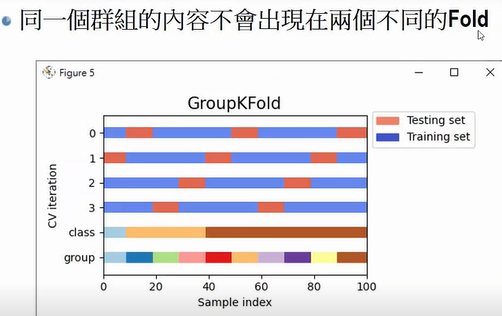

In [51]:
#Complete guide to Python’s cross-validation with examples(https://towardsdatascience.com/complete-guide-to-pythons-cross-validation-with-examples-a9676b5cac12)
#GitHub:Cross Validation(https://github.com/vaasha/Machine-leaning-in-examples/blob/master/sklearn/cross-validation/Cross%20Validation.ipynb)

# Import scikit-learn libraries
from sklearn.model_selection import GroupKFold, StratifiedKFold, train_test_split, cross_validate, cross_val_score
from sklearn.datasets import load_iris, load_boston
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# import libraries for charting and manipulations with datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random


iris = load_iris(return_X_y=False)
iris_df = pd.DataFrame(data=iris.data,columns=iris.feature_names)
display(iris_df)

number_groups = 3
groups = np.floor(np.linspace(0, number_groups, len(iris.target))) #向下取整數 
print('groups=\n',groups)
y = (iris.target > 0).astype(int)
print('y=\n',y)

features = iris['feature_names']
iris_df['target'] = iris.target
print(iris_df)

iris_df["target_name"] = iris_df['target'].map({i:name for i,name in enumerate(iris.target_names)})
print(iris_df.sample(5))

# initialize the model
model = LogisticRegression(solver="liblinear", multi_class="auto")

dfs = []
gkf = GroupKFold(n_splits=3)
i = 1

for train_index, test_index in gkf.split(iris_df, y, groups):
    X_train = iris_df.iloc[train_index].loc[:, features]
    X_test = iris_df.iloc[test_index].loc[:,features]
    y_train = iris_df.iloc[train_index].loc[:,'target']
    y_test = iris_df.loc[test_index].loc[:,'target']
    
    #Train the model
    model.fit(X_train, y_train) #Training the model
    y_pred = model.predict(X_test)
    print(f"Accuracy for the fold no. {i} on the test set: {accuracy_score(y_test, y_pred)}")
    
    # how many occurances appear in the train set
    s_train = iris_df.iloc[train_index].loc[:,'target_name'].value_counts()
    s_train.name = f"train {i}"
    s_test = iris_df.iloc[test_index].loc[:,'target_name'].value_counts()
    s_test.name = f"test {i}"
    df = pd.concat([s_train, s_test], axis=1, sort=False)
    df["|"] = "|"
    dfs.append(df)
    
    i += 1

print(pd.concat(dfs,axis=1, sort=False))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


groups=
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 3.]
y=
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4  

## 8.TimeSeriesSplit
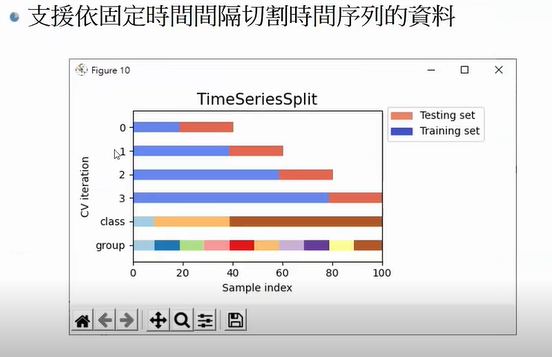

,Sunspots
Month,
1749-01,58.0
1749-02,62.6
1749-03,70.0
1749-04,55.7
1749-05,85.0
...,...
1983-08,71.8
1983-09,50.3
1983-10,55.8


Observations: 1410
Training Observations: 705
Testing Observations: 705
Observations: 2115
Training Observations: 1410
Testing Observations: 705
Observations: 2820
Training Observations: 2115
Testing Observations: 705


C:\Users\mikal\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
C:\Users\mikal\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
C:\Users\mikal\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do thi

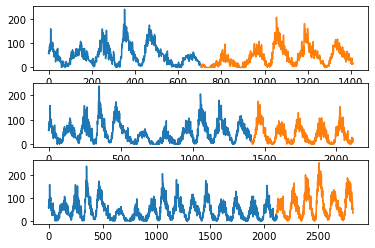

In [37]:
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt 
import pandas as pd

series = pd.read_csv(r'Datasets\sunspots.csv', header=0, index_col=0) # 時間與太陽黑子數量
display(series)

X = series.values  # 時間日期: 
splits = TimeSeriesSplit(n_splits=3) # 切時間日期資料 (用於股票，傳染病日期)
plt.figure(1)

index = 1
for train_index, test_index in splits.split(X):
    train = X[train_index]
    test = X[test_index]
    print('Observations: %d' % (len(train) + len(test)))
    print('Training Observations: %d' % (len(train)))
    print('Testing Observations: %d' % (len(test)))
    plt.subplot(310 + index)
    plt.plot(train)
    plt.plot([None for i in train] + [x for x in test])
    index += 1
plt.show()

In [33]:
### **補充**
import pandas as pd
from sklearn.model_selection import StratifiedKFold,RepeatedKFold, train_test_split, cross_validate, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

df=pd.read_csv(r"Datasets\titanic.csv")
display(df.Age.head(10))

columns =['Pclass','Sex','Age']
medianAge =df.Age.median()
df.Age.fillna(medianAge, inplace=True)
display(df.Age.head(10))

df.Sex =np.where(df.Sex == 'female',0,1) # if 'female' , sex 欄位=1, else =0(male)
display(df.Sex.head(10))
x = df[columns]
y = df.Survived

model = LogisticRegression()
# kf = StratifiedKFold(n_splits=3, shuffle =True,random_state=123)
kf = RepeatedKFold(n_splits=3, n_repeats=2, random_state=42)# 共作6次
i=1
for train_index, test_index in kf.split(df, df.Survived):
    X_train = df.iloc[train_index].loc[:,columns]
    X_test  = df.iloc[test_index].loc[:,columns]
    y_train = df.iloc[train_index].loc[:,'Survived']
    y_test  = df.iloc[test_index].loc[:,'Survived']
    model.fit(X_train,y_train)
     #Train the model
    model.fit(X_train, y_train) #Training the model
    print(f"Accuracy for the fold no. {i} on the test set: {accuracy_score(y_test, model.predict(X_test))}, doublecheck: {model.score(X_test,y_test)}")
    i+=1

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    28.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

0    1
1    0
2    0
3    0
4    1
5    1
6    1
7    1
8    0
9    0
Name: Sex, dtype: int32

Accuracy for the fold no. 1 on the test set: 0.8148148148148148, doublecheck: 0.8148148148148148
Accuracy for the fold no. 2 on the test set: 0.7777777777777778, doublecheck: 0.7777777777777778
Accuracy for the fold no. 3 on the test set: 0.7710437710437711, doublecheck: 0.7710437710437711
Accuracy for the fold no. 4 on the test set: 0.7676767676767676, doublecheck: 0.7676767676767676
Accuracy for the fold no. 5 on the test set: 0.8047138047138047, doublecheck: 0.8047138047138047
Accuracy for the fold no. 6 on the test set: 0.7845117845117845, doublecheck: 0.7845117845117845
